# Methods for Data Science Coursework 1

## Introdution

In this coursework, we are going to run two main task:
$$$$ - a regression task using a housing market dataset
$$$$ - a binary classification task using a collection of credit applications

We will accomplish these tasks using different methods and comparing the obtained results. 

## 1 Regression

The first regression task uses 17 features of a collection of households as predictors to predict the target variable: the meadian value of owner-occupied homes. Let's have a look at the given data and run a brief exploratory data analysis.

First, we import the python tools we are going to need to work with the data.

In [2087]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

Next, lets import the files in order to have a first look at the data and its configuration. The first column of the data set corresponds to the bias term equal to 1, such that our data is augmented, the last column is our target value and the rest of the columns are the predictors.

In [2088]:
regression_train = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/regression_train.csv')
regression_train.head(11)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,-0.413,-0.488,0.116,0.116,0.1580,0.985,0.797,-0.774,0.985,-0.8030,1.180,0.4410,-0.9830,0.1580,1.180,-0.488,-0.774,23.9
1,1.0,-0.413,-0.488,-1.030,-1.030,-0.3860,0.820,0.207,-0.418,0.820,-0.6670,-0.858,0.3790,-0.8040,-0.3860,-0.858,-0.488,-0.418,29.9
2,1.0,-0.388,-0.488,-0.211,-0.211,0.2620,-0.511,-0.924,-0.672,-0.511,-0.1020,0.344,0.4410,0.1310,0.2620,0.344,-0.488,-0.672,24.5
3,1.0,-0.348,-0.488,-0.720,-0.720,-0.4120,0.847,0.324,-0.249,0.847,-0.6010,-0.488,0.3700,-0.3820,-0.4120,-0.488,-0.488,-0.249,27.5
4,1.0,-0.331,-0.488,-0.437,-0.437,-0.1440,0.300,0.918,0.314,0.300,-0.6010,1.180,0.3430,0.0206,-0.1440,1.180,-0.488,0.314,18.4
5,1.0,0.371,-0.488,1.020,1.020,1.3700,-0.290,0.563,-0.512,-0.290,1.5300,0.807,0.4410,0.2870,1.3700,0.807,-0.488,-0.512,20.0
6,1.0,-0.400,-0.488,-0.211,-0.211,0.2620,-0.823,-0.518,-0.672,-0.823,-0.1020,0.344,0.4410,-0.0901,0.2620,0.344,-0.488,-0.672,21.8
7,1.0,-0.417,-0.488,-0.868,-0.868,-0.3430,-0.555,-0.319,0.865,-0.555,-1.0900,0.807,0.4180,-0.2930,-0.3430,0.807,-0.488,0.865,18.5
8,1.0,-0.392,-0.488,-0.548,-0.548,-0.5330,-0.287,-0.885,0.771,-0.288,-0.7200,0.529,0.4410,0.0192,-0.5330,0.529,-0.488,0.771,22.2
9,1.0,-0.278,-0.488,1.230,1.230,0.4350,0.938,1.030,-0.912,0.938,-0.0311,-1.740,0.0741,-1.1300,0.4350,-1.740,-0.488,-0.912,41.3


As with any other supervised machine learning method, we create a train and test set to learn and evaluate our model, respectively. We split our two datasets into X_tain, X_test (17 predictors) and y_train, y_test (target value).

In [2089]:
y_train=regression_train[['18']] #y is the last columns
X_train=pd.DataFrame(regression_train.drop(['18'],axis=1)) #X is the augmented data
#converting dataframes into numpy arrays
X_train=X_train.values
y_train=y_train.values

In [2090]:
regression_test = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/regression_test.csv')
y_test=regression_test[['18']]
X_test=pd.DataFrame(regression_test.drop(['18'],axis=1))
#converting dataframes into numpy arrays
X_test=X_test.values
y_test=y_test.values

Before anaysing the data, we are going to standardise the predictors to get more accurate results.

In [2091]:
#standardise the data column per column
def standardise(X):
    N,D=X.shape
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_std= (X - mu) / sigma
    return X_std

Let's standardise our data now: the test data is standardised according to the training data such that the model fits the test data the same way it fits the training data. 

In [2092]:
#standardise excluding the column of 1s
X_train[:,1:]=standardise(X_train[:,1:]) 
mu = np.mean(X_train[:,1:], 0)
sigma = np.std(X_train[:,1:], 0)
X_test[:,1:] = (X_test[:,1:] - mu) / sigma #standardise excluding the column of 1s

We can check that our data is well standardised, expecting the `.describe()` function to give mean close to 0 and standard deviation close to 1, for each predictor. 

In [2093]:
pd.DataFrame(X_train).describe().head(3).tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean,1.0,-3.462577e-17,1.588388e-16,9.796894e-17,9.796894e-17,-2.912961e-17,3.022884e-17,1.319077e-17,-1.044269e-17,8.793846e-18,3.847308e-18,-1.277856e-17,-2.366781e-17,-1.319077e-17,-2.912961e-17,-4.153031e-17,1.588388e-16,4.465625e-18
std,0.0,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00


In [2094]:
pd.DataFrame(X_test).describe().head(3).tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean,1.0,0.028679,-0.227604,0.202661,0.202661,0.153999,-0.216775,0.21661,-0.125405,-0.216775,0.164995,0.195484,-0.107752,0.176905,0.153999,0.195475,-0.227604,-0.125385
std,0.0,0.852144,0.636234,0.971752,0.971752,1.040300,0.965936,0.96258,0.922040,0.965934,1.038157,0.881732,1.175577,1.013787,1.040300,0.881731,0.636234,0.922016


The data is finally ready to be used for regression to predict the target values. We will compare the results of 3 different model: Linear regression, Ridge regression and Regression with k nearest neighbours. All 3 models will be trained using the training data and tested on the test data. To compare the models we will compare their respective in-sample mean squared error (MSE) from the training data and the out-sample MSE from the testing data). 

### 1.1 Linear regression

#### 1.1.1

We consider our problem to be a linear regression problem of the form:
$$
y_i = \boldsymbol x_i^T\boldsymbol\beta + \epsilon_i\,,\quad \epsilon_i \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x_i \in\mathbb{R}^{18}$ are the inputs of the predictors and $y_i \in\mathbb{R}$ is the noisy target variable (for one observation i). The parameter vector $\boldsymbol\beta\in\mathbb{R}^{18}$ parametrizes the function and will define our linear regression model.

This equation can be extended to our entire training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$, using the following matrix-vector formulation:
$$ 
\mathrm{y\_train} = \mathrm{X\_train} \cdot \boldsymbol\beta
$$
where X\_train is our data of predictors and corresponding training targets y\_train, respectively.

The objective is to find our optimal vector of parameters $\boldsymbol \beta^{*}$, by minimising the following Least Squares loss function:
$$
\underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{LS}} (\boldsymbol\beta) = \mathrm{min}_{\beta} \mathrm{L}_{\mathrm{LS}}(\beta)
$$
From our lectures, we know that the least squares solution is the otpimal parameters $\boldsymbol\beta^{*}$, as below:
$$
\boldsymbol\beta^{*} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^{18}\,.
$$

We will apply this formulation to our training set, using this next function.

In [2054]:
#Least squares solution
def ls_estimate(X, y):
    N, D = X.shape
    beta_ml = np.linalg.solve(X.T @ X, X.T @ y) #from lecture notes
    return beta_ml

This least squares solution is the vector of parameters of the linear regression model, given by:

In [2055]:
beta_ls=ls_estimate(X_train, y_train)
pd.DataFrame(beta_ls.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,23.018564,-0.567595,4.990858e+09,1.645330e+09,-1.645330e+09,-2.649212,-677.107513,-0.077803,-491.881262,680.317327,0.059318,-2.48789,0.906091,-3.565975,0.976744,0.716156,-4.990858e+09,488.375616


We can now predict a set of target vectors given the parameters $\boldsymbol \beta$ and the data $\boldsymbol X$, by:
$$
\boldsymbol y_{pred} = \boldsymbol X \cdot \boldsymbol \beta
$$

In [2056]:
def predict_beta(X,y,beta):
    y_pred=X@beta #predict y
    return y_pred

##### In-sample MSE 

Now, to evaluate the quality of the fit of our linear regression model with our training data, we can use the in-sample MSE, given by:
$$
MSE(\beta^{*}) = \frac{1}{N} \underset{i=1}{\sum}^{N} \boldsymbol e^{T} \cdot \boldsymbol e = \frac{1}{N} \underset{i=1}{\sum}^{N} (\boldsymbol y_{pred} - \boldsymbol y)^{T} \cdot (\boldsymbol y_{pred} - \boldsymbol y)
$$
where $\boldsymbol e = \boldsymbol y_{pred} - \boldsymbol y$ is the vector of residuals, quantifying the error of fit.

In [2057]:
#Mean square error
def MSE(X, y, beta):
    N, D = X.shape
    e = y-X@beta #residual
    mse = 1/N * e.T@e #from lecture notes
    return mse

In [2058]:
mse_in=MSE(X_train,y_train,beta_ls)
mse_in

array([[23.89871145]])

We will interpret this value later on together with the out-sample MSE. To get a better insight of how the quality of the fit, we can plot the residuals with respect to the predicted values to understand where the biggest errors come from. 

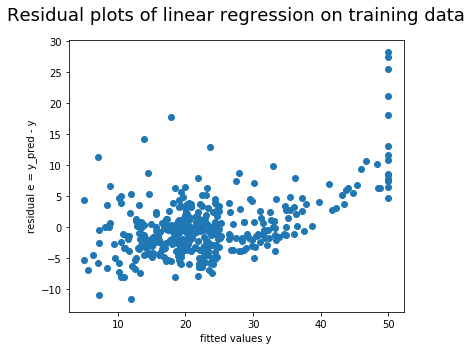

In [2059]:
y_pred=predict_beta(X_train,y_train,beta_ls)
e = y_train-y_pred #residual
plt.figure(figsize=(6,5))
plt.scatter(y_train,e)
plt.xlabel('fitted values y')
plt.ylabel('residual e = y_pred - y')
plt.title('Residual plots of linear regression on training data', y=1.05, fontsize=18)
plt.show()

#### 1.1.2

Now, to further estimate the quality of our linear regression model, we apply the same prediction and MSE formula to our test dataset, as below:

In [2060]:
#y_pred_test=predict_beta(X_test,y_test,beta_ls)
mse_out=MSE(X_test,y_test,beta_ls)
mse_out

array([[19.83789526]])

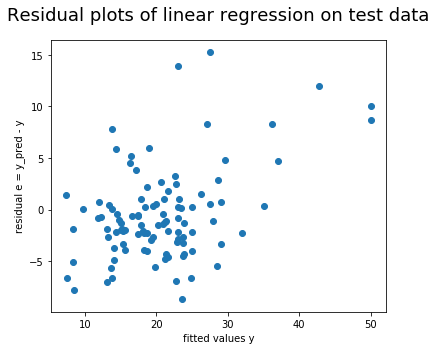

In [2061]:
y_pred_test=predict_beta(X_test,y_test,beta_ls)
e_test = y_test-y_pred_test #residual
plt.figure(figsize=(6,5))
plt.scatter(y_test,e_test)
plt.xlabel('fitted values y')
plt.ylabel('residual e = y_pred - y')
plt.title('Residual plots of linear regression on test data', y=1.05, fontsize=18)
plt.show()

###### Interpretation of in-sample and out-sample MSE
Recall that the MSE evaluates the quality of $\boldsymbol y_{pred}$, by:
$$
\mathrm{MSE}(\boldsymbol y_{pred}) = \mathrm{Var}_{\boldsymbol y}(\boldsymbol y_{pred}) + \mathrm{Bias}_{\boldsymbol y}(\boldsymbol y_{pred})^{2}
$$
where $\mathrm{Bias}_{\boldsymbol y}(\boldsymbol y_{pred})^{2} = (\boldsymbol X^T\boldsymbol X)^{-1}(\boldsymbol X^T\boldsymbol X) \beta^{*} - \beta^{*} = 0$ for least squares solution $\beta^{*}$. 

The MSE evaluates the quality of fit by getting a small variance and a good estimate. The ideal fit will give a MSE of zero, meaning that the model predicts outputs with perfect accuracy, but it is generally impossible. Therefore, the smaller the MSE (here the variance), the better the fit.

We could expect, the in-sample MSE to be slightly smaller than the out-of-sample MSE, since our model has been constructed with the training dataset. However, we can notice that here, the in-sample MSE is indeed slightly larger than the out-of-sample MSE, which is not very coherent. There could be several hypothetical explanations fore this: the data is not clean enough (leading to noisy predictions) or the testing and training data has not been splitted the proper way (giving more noisy training data and less noisy testing data for example).

We can also notice that both mses are quite high. The interpretation of the residual plots let's us think that large values of y are badly fitted (assoicated with large residual). This is specially the case for the target values of the training data.

This suggests that the model can be improved, using ridge regression and / or regression by knn.

## 1.2 Ridge regression


#### 1.1.2


To improve the quality of the model, we introduce the ridge regression, which reduces the variance by improving the accuracy of fitted values.

From our lectures, we know that ridge regression is an extension of linear regression with least squares problem. We add to the least squares loss function, a (usually small) positive penalty term $\lambda$, giving the ridge loss function $\text{L}_{\text{ridge}}$ below:
$$
\underset{\boldsymbol\beta}{\text{min}} \| y -  \boldsymbol X \boldsymbol\beta \|^2 + \lambda \| \boldsymbol\beta \|^2 = \underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{ridge}} (\boldsymbol\beta)
$$
Minimising the ridge loss function, gives the solution:
$$
\boldsymbol\beta^{*}_{\text{ridge}} = (\boldsymbol X^T\boldsymbol X + \lambda I)^{-1}\boldsymbol X^T\boldsymbol y \, 
$$
We notice that when $\lambda=0$, this is simply the least squares solution.

The penalty term is introduced here to act as weighter of the parameters, ie. the penalty term penalise the large values of $\| \beta \|$ to avoid inaccurate predictions.  

The next function applies the ridge parameter formula to our data, obtaining $\beta^{*}_{\mathrm{ridge}}$.

In [2153]:
#ridge solution
def ridge_param(X, y, penalty):
    N, D = X.shape
    beta_ri = np.linalg.solve(X.T @ X + penalty*np.eye(D), X.T @ y) #from lecture notes
    return beta_ri

Now, the task is to use a 5-fold cross-validation algorithm to tune the ridge model. The aim of this is to construct 5 sample of training data and test data, only from the original training data. We will proceed to the 5-fold cross-validation. First, we split the training data into 5 folds and 5 validation set: for each fold, the validation set acts like a test data, and we use 5 of them to get a better tune of the ridge model. 

Then for each fold and validation set:
- step (1) train several models with different penalty terms over a range of penalty terms 
- step (2) calculate the out-of-sample MSE for each ridge regression model obtained
- step (3) chose the penalty term leading to the smallest out-of-sample MSE: this is an estimation of the optimal $\lambda^{*}$

Indeed, a crucial step to improve the model results is to find the optimal penalty term $\lambda^{*}$. The function above, solves this optimisation problem by chosing the penalty term giving the lowest out-of-sample MSE.

In [2154]:
def find_penalty(penalty_terms,X,y,X_test,y_test):
    mses_ri = np.zeros((len(penalty_terms),1))
    betas_ri=np.zeros((18,len(penalty_terms)))
    
    for i in range(len(penalty_terms)):
        penalty=penalty_terms[i]
        beta=ridge_param(X, y, penalty) #step (1) ridge regression for penalty
        betas_ri[:,i:i+1]=beta #store
        mses_ri[i:i+1] = MSE(X_test, y_test, beta) #step (2) calculate MSE with validation test
    opt_mse_index=np.argmin(mses_ri) #step (3) minimising MSE
    opt_penalty=penalty_terms[opt_mse_index]
    opt_beta=betas_ri[:,opt_mse_index:opt_mse_index+1]
    return mses_ri,opt_penalty,opt_beta

#### 5-fold cross-validation

We load the same data again before splitting the training data into folds and validation sets for the 5-fold cross-validation. 

In [2170]:
regression_train = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/regression_train.csv')
regression_test = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/regression_test.csv')
X=pd.DataFrame(regression_train.drop(['18'],axis=1))
y=regression_train[['18']]
X_train=X.values
y_train=y.values
X_test=pd.DataFrame(regression_test.drop(['18'],axis=1))
y_test=regression_test[['18']]
X_test=X_test.values
y_test=y_test.values
X_train[:,1:]=standardise(X_train[:,1:])
mu = np.mean(X_train[:,1:], 0)
sigma = np.std(X_train[:,1:], 0)
X_test[:,1:] = (X_test[:,1:] - mu) / sigma #standardise excluding the column of 1s

Before, proceding to the 5-fold cross-validation, we shuffle the data to avoid having unbalanced validation sets. We use random seed, to obtain the same permutations. 

In [2171]:
def shuffle(X):
    import random
    seed = 10
    np.random.seed(seed) #the random seed
    X_shuf=np.random.permutation(X) 
    return X_shuf

Now, we can split the data into 5-fold cross-validation. 

In [2172]:
#k-fold 
def split_5fold(X,y,T):
    N, D = X.shape
    X=shuffle(X) #shuffle data
    t=math.floor(N/T) #number of rows per validation set
    X=X[:t*T]
    y=y[:t*T]
    #we will append folds and validation sets in list of length 5
    X_fold=[]
    y_fold=[]
    X_fold_test=[]
    y_fold_test=[]
    for i in range(5):
        #ith fold is X without ith validation set
        X_fold.append(np.delete(X,np.array(range(t*i,t*(i+1))),0))
        y_fold.append(np.delete(y,np.array(range(t*i,t*(i+1))),0))
        #set the validation sets
        X_fold_test.append(X[t*i:t*(i+1)])
        y_fold_test.append(y[t*i:t*(i+1)])
    return X_fold,X_fold_test,y_fold,y_fold_test

In [2173]:
X_fold,X_fold_test,y_fold,y_fold_test=split_5fold(X_train,y_train,5)

Now, let's find the optimal penalty term for one fold and plot the MSE of the ridge regression model with respect to the corresponding to indeed demonstrate that the minimising penalty term $\lambda^{*}$ is coherent, when scaning over a range of penalty terms.

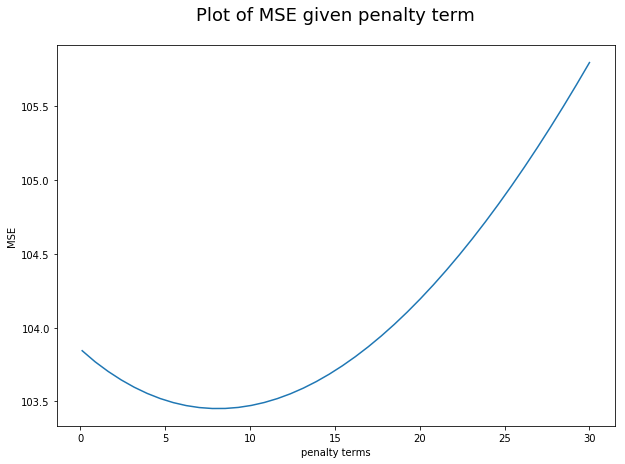

In [2174]:
#plot for 4th fold
penalty_terms = np.linspace(0.1,30,40) #penalty is positive only ???
nb=len(penalty_terms)
mses_rig,penalty_best,betas_rig=find_penalty(penalty_terms,X_fold[0],y_fold[0],X_fold_test[0],y_fold_test[0])

plt.figure(figsize=(10,7))
plt.plot(penalty_terms,mses_rig)
plt.xlabel('penalty terms')
plt.ylabel('MSE')
plt.title('Plot of MSE given penalty term', y=1.05, fontsize=18)
plt.show()

The corresponding MSE (using the remaining validation set) return a smooth function with a quadratic shape and therefore the minimising value $\lambda^{*}$ is easily visible and coherent. 

Let's apply now the same method to the 5 folds cross-validation. This will return 5 different optimal penalty terms for each fold, and we will try 3 methods to obtain the final optimal penalty term for the entire of the training data:
- method (1) average the 5 optimal penalty terms such that: $\lambda^{*} = \frac{1}{5} \underset{i=1}{\sum}^{5} \lambda_{i}^{*}$ 
- method (2) add the mse for the 5 folds and find the optimal penalty term: $\lambda^{*} = \underset{\beta}{\mathrm{argmin}} \underset{i=1}{\sum}^{5} \mathrm{MSE}_i (\lambda)$

where $\lambda_i$ is the optimal penalty term for $i^{th}$ fold and $\mathrm{MSE}_i$ is its corresponding vector if mean squared errors (with $i^{th}$ validation set)

In [2175]:
#5-fold cross validation
def cross_val_mean(X,y):
    penalty_terms = np.linspace(0.001,20,100)
    nb=len(penalty_terms)
    mses_rig=np.zeros((nb,5))
    penalty_best=np.zeros(5)
    mses_rig_mean=0
    
    X_fold,X_fold_test,y_fold,y_fold_test=split_5fold(X,y,5) 
    for i in range(5):
        mses_rig[:,i:i+1],penalty_best[i:i+1],_=find_penalty(penalty_terms,X_fold[i],y_fold[i],X_fold_test[i],y_fold_test[i])
    mses_rig_mean=np.mean(mses_rig,axis=1) # method(2) calculate mean of mses_rig over 5 fold
    opt_mse_index=np.argmin(mses_rig_mean)
    penalty_best_mean=penalty_terms[opt_mse_index] #best parameter for all 5 folds mixed
    return penalty_best_mean,penalty_best

In [2176]:
penalty_best2,penalty_best_all=cross_val_mean(X_train,y_train)
print(penalty_best_all)
penalty_best1=np.mean(penalty_best_all)
print(penalty_best1,penalty_best2)

[8.08140404e+00 1.00000000e-03 1.59597980e+01 2.03010101e-01
 1.00000000e-03]
4.849242424242425 0.001


From the 5-fold cross-validation, we obtain the 2 optimal penalty terms: 4.85 (for method 1) and 0.001 (for method 2) which tends to give simply the least squares solutions. 
Therefore, we are more likely to chose method (1) as ridge regression is supposed to improve our MSE. Let's confirm our choice by evaluating the in-sample MSE and ou-of-sample MSE to find which one is more minimising. 

We evaluate the parameters for both optimal penalty terms.

#### 1.2.2

We will again measure the in-sample MSE and out-of-sample MSE to compare the linear regression with the ridge regression (method 1 and 2). 

In [2177]:
#mse in and out
def mse_in_out_rig(X,X_test,y,y_test,penalty_best1,penalty_best2):    
    mse_in1=MSE(X, y, ridge_param(X, y, penalty_best1)) #in sample mse with optimal penalty term 1
    mse_in2=MSE(X,y,ridge_param(X, y, penalty_best2)) #in sample mse with optimal penalty term 
    mse_out1=MSE(X_test, y_test, ridge_param(X, y, penalty_best1)) #out sample mse with optimal penalty term 1
    mse_out2=MSE(X_test,y_test,ridge_param(X, y, penalty_best2))#out sample mse with optimal penalty term 2
    return mse_in1,mse_in2,mse_out1,mse_out2

In [2178]:
mse_in1,mse_in2,mse_out1,mse_out2=mse_in_out_rig(X_train,X_test,y_train,y_test,penalty_best1,penalty_best2)
print('MSE of ridge model with method 1:', 'in-sample', mse_in1, 'out-of-sample', mse_out1)
print('MSE of ridge model with method 2:', 'in-sample', mse_in2, 'out-of-sample', mse_out2)
print('MSE of linear model:', 'in-sample', mse_in, 'out-of-sample', mse_out)

MSE of ridge model with method 1: in-sample [[24.6351335]] out-of-sample [[19.42781779]]
MSE of ridge model with method 2: in-sample [[24.33057797]] out-of-sample [[19.67871997]]
MSE of linear model: in-sample [[23.89871145]] out-of-sample [[19.83789526]]


Comparing the results method (1) and (2) to find the optimal penalty term, we choose method (1) with $\lambda^{*} = \frac{1}{5} \underset{i=1}{\sum}^{5} \lambda_{i}^{*}$.
Why? Because even if the in-sample MSE is not particularly improved, it returns a smaller out-of-sample MSE. We give more importance to the improvement of out-of-sample MSE because in application, we will not have the test data and therefore we will not know how good the fitted values for the test data.

We can again plot the residual plots to see where the errors come from.

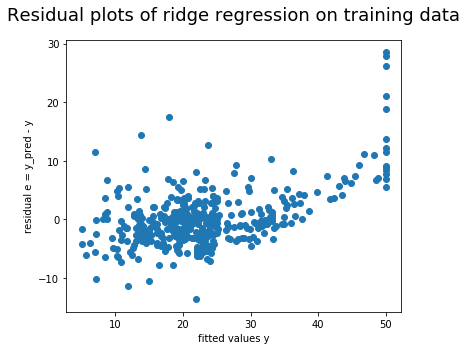

In [2181]:
ridge_beta=ridge_param(X_train, y_train, penalty_best1) #ridge parameters with optimal penalty term 
y_pred=predict_beta(X_train,y_train,ridge_beta)
e = y_train-y_pred #residual
plt.figure(figsize=(6,5))
plt.scatter(y_train,e)
plt.xlabel('fitted values y')
plt.ylabel('residual e = y_pred - y')
plt.title('Residual plots of ridge regression on training data', y=1.05, fontsize=18)
plt.show()

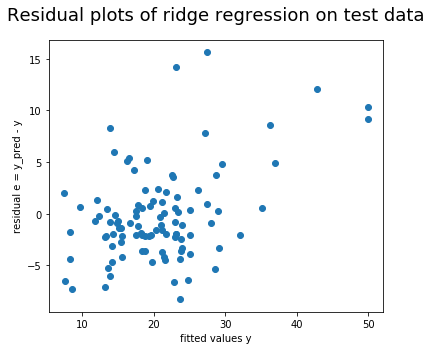

In [2182]:
y_pred_test=predict_beta(X_test,y_test,ridge_beta)
e_test = y_test-y_pred_test #residual
plt.figure(figsize=(6,5))
plt.scatter(y_test,e_test)
plt.xlabel('fitted values y')
plt.ylabel('residual e = y_pred - y')
plt.title('Residual plots of ridge regression on test data', y=1.05, fontsize=18)
plt.show()

The errors are not necessarily more equally distributed: they still show big errors for large values of y (like the residual plot for linear regression). This could further implicate that our data is not homogeneous.

The out-of-sample MSE of the ridge regression model decreases slightly compared to the linear regression. 

. the estimators $\hat{y}$ are not unbiased anymore: $\mathrm{bias} (\beta^{*}_{\mathrm{ridge}}) = - \lambda (X^{T}X + \lambda I)^{-1} \beta$ 

. the variance decreases: from the lecture notes, we know that using the eigendecomposition:  $ X^{T}X = VDV^{T} $ :
$\mathrm{var}(\beta^{*}_{\mathrm{ridge}}) = \sigma^{2} V ((D + \lambda I)^{-1} D (D + \lambda I)) V^{T}$ > $\mathrm{var}(\beta^{*}) = -\lambda (X^{T}X + \lambda I)^{-1} \beta$ 

In our case, the variance decrease compensates the bias of the linear regression fitted values and therefore the out-of-sample MSE is smaller than the linear regression one.

Finally, to compare and understand the differences between the obtained linear and ridge regression models, we will report the values of the penalty parameters $\beta^{*}$ and $\beta^{*}_{ridge}$ and plot them to spot the predictors with the largest differences.

Ridge regression parameters [[22.74554783 -0.66206814  0.59312733 -0.10471494 -0.10471494 -0.80760041
   1.55315803 -0.15484136 -1.7291126   1.62558776 -0.10464183 -0.89046641
   0.78054978 -3.54019333 -0.80760041 -0.89059029  0.59312733 -1.71748163]]
Linear regression parameters [[ 2.30185644e+01 -5.67595081e-01  4.99085798e+09  1.64533042e+09
  -1.64533042e+09 -2.64921221e+00 -6.77107513e+02 -7.78033731e-02
  -4.91881262e+02  6.80317327e+02  5.93181838e-02 -2.48789017e+00
   9.06090611e-01 -3.56597468e+00  9.76744137e-01  7.16156267e-01
  -4.99085797e+09  4.88375616e+02]]


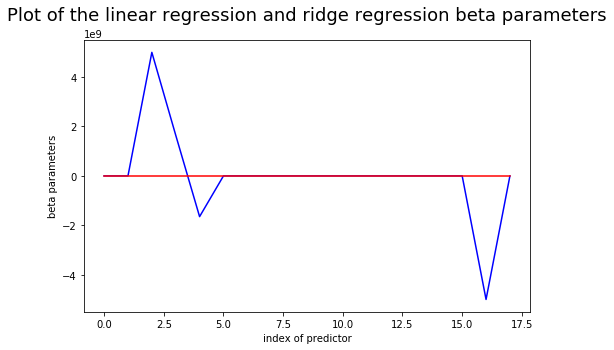

In [2073]:
ridge_beta=ridge_param(X_train, y_train, penalty_best1) #ridge parameters with optimal penalty term 
print('Ridge regression parameters', ridge_beta.T)
print('Linear regression parameters',beta_ls.T)
plt.figure(figsize=(8,5))
x = np.linspace(0, 17, 18)
plt.plot(x,beta_ls, '-b', label='Linear')
plt.plot(x,ridge_beta, '-r', label='Ridge')
plt.xlabel('index of predictor')
plt.ylabel('beta parameters')
plt.title('Plot of the linear regression and ridge regression beta parameters', y=1.05, fontsize=18)
plt.show()

We notice that the penalty term $\lambda$ in ridge regression indeed plays a major role when penalising some predictors. From the plot, it particularly shrinks the parameters corresponding to the predictors with index 2, 4 and 16, the absolute value of their coefficients is smaller and therefore predictors with index 2, 4 and 16 have a smaller impact on the fitted values than with the linear regression model. This explains also the lower variance and why the ridge regression is considered a shrinkage method. 

Furthermore, with further research, to test if the assumption of a linear regression is correct, we can check one things:
- the residual plots are equally distributed aroung the X-axis and Y-axis.

Since this condition is not satisfied by neither the ridge or linear regression we cannot validate the assumption of linear regression. Therefore, we will try another method of regression that is not linear: regression with knn.

### 1.3 Regression with k nearest neighbours (kNN)

The last method we will see for regression is the kNN algorithm. This algorithm doesn't rely on a assumption of linear model like the previous models. To get an idea of how it works, here are its steps:
- step (1) calculae the distance of a given point 𝑥 to all other points in the data set
- step (2) find the k_nearest points closest to 𝑥
- step (3) assign the new point 𝑥 to the mean of labels the k_nearest points.

#### 1.3.1

First, we load the data and get rid of the columns of 1 value because they are not useful when calculating the distance between points. 

In [2190]:
regression_train = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/regression_train.csv')
y=regression_train[['18']] #y is the last columns
X=pd.DataFrame(regression_train.drop(['18'],axis=1)) #X is the augmented data
#converting dataframes into numpy arrays
X=X.values
y=y.values

In [2191]:
X[:,1:]=standardise(X[:,1:]) #standardise excluding the column of 1s

In [2192]:
regression_test = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/regression_test.csv')
y_test=regression_test[['18']]
X_test=pd.DataFrame(regression_test.drop(['18'],axis=1))
#converting dataframes into numpy arrays
X_test=X_test.values
y_test=y_test.values

In [2193]:
mu = np.mean(X[:,1:], 0)
sigma = np.std(X[:,1:], 0)
X_test[:,1:] = (X_test[:,1:] - mu) / sigma #standardise excluding the column of 1s

In [2194]:
#k-fold 
def split_5fold(X,y,T):
    N, D = X.shape
    t=math.floor(N/T)
    #X=shuffle(X)
    X=X[:t*T,:]
    y=y[:t*T,:]
    X_fold=[]
    y_fold=[]
    X_fold_test=[]
    y_fold_test=[]
    for i in range(5):
        X_fold.append(np.delete(X,np.array(range(t*i,t*(i+1))),0))
        y_fold.append(np.delete(y,np.array(range(t*i,t*(i+1))),0))
        X_fold_test.append(X[t*i:t*(i+1),:])
        y_fold_test.append(y[t*i:t*(i+1),:])
    return X_fold,X_fold_test,y_fold,y_fold_test

In [2195]:
X=X[:,1:]
X_test=X_test[:,1:]

Starting with step 1, the next function calculates the euclidian distance between two vector-points.

In [2196]:
def euclidian_distance(p, q):
    return np.sqrt(np.sum((p-q)**2, axis=1))

Now, the following function implements step 2: for each new point, it creates a matrix with the indices and distances of the k nearest neightbours (k closest points to new point).

In [2197]:
def k_neighbours(X_test,X, k, return_distance=False):
    n_neighbours = k
    dist = []
    neigh_ind = []
  
    # compute distance from each point x_text in X_test to all points in X_train 
    point_dist = [euclidian_distance(x_test, X) for x_test in X_test]

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k] #sort k neighbours from closest to most far away

        ind_list = [tup[0] for tup in sorted_neigh] #index training points
        dist_list = [tup[1] for tup in sorted_neigh] #distance with training points

        dist.append(dist_list)
        neigh_ind.append(ind_list)
  
    # return distances together with indices of k nearest neighbouts
    if return_distance:
        return np.array(dist), np.array(neigh_ind)
  
    return np.array(neigh_ind)

The next function implements step (3) by setting the predicted value $\hat{y}$ to be equal to the mean of the values of its neighbourhood.

In [2198]:
def reg_predict(X_test, X_train, y_train, k):
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_test,X_train,k=k)
    # compute mean over neighbours labels (hint: use python's list comprehension)
    N,D=X_test.shape
    y_pred=np.zeros((N,1))
    y_pred[:,0] = np.array([np.mean(y_train[neighbour]) for neighbour in neighbours])
    return y_pred

(i) We need to demonstrate that the iteration over k \in [0,1, ..., 20] in the function 'find_k' below will return the optimal k that minimises the MSE. Similarly to ridge regression: we look for the number of k neighbours that minimise the MSE. We implement this optimisation problem below.

In [2199]:
#Mean square error
def MSE_knn(y_pred, y):
    N, D = y.shape
    e = y-y_pred
    mse = 1/N * e.T@e #from lecture notes
    return mse

In [2200]:
def find_k(k_terms,X,y,X_test,y_test):
    mses_knn = np.zeros((len(k_terms),1))
    for i in range(len(k_terms)):
        k=k_terms[i]
        y_pred=reg_predict(X_test, X, y, k)
        mses_knn[i:i+1]=MSE_knn(y_pred, y_test) #calculate MSE between predicted y using X and y_test
    opt_mse_index=np.argmin(mses_knn)
    k_best=k_terms[opt_mse_index]
    return mses_knn,k_best

Again, we proceed to a 5-fold cross-validation to get the optimal hyperparameter $k^{*}$. This time, since k is a discrete hyperparameter,  taking the mean of the 5 integers  𝑘𝑖  will not necessarily give an optimal integer  𝑘∗. Therefore, we use the other method introduced earlier:
- method (2) add the mse for the 5 folds and find the optimal k: $k^{*} = \underset{\beta}{\mathrm{argmin}} \underset{i=1}{\sum}^{5} \mathrm{MSE}_i (k)$

In [2201]:
X_fold,X_fold_test,y_fold,y_fold_test=split_5fold(X,y,5)

Before, proceeding the 5-fold cross-validation, we will use one fold to:
(ii) Examine the MSE and distribution of the errors obtained on the corresponding validation set.

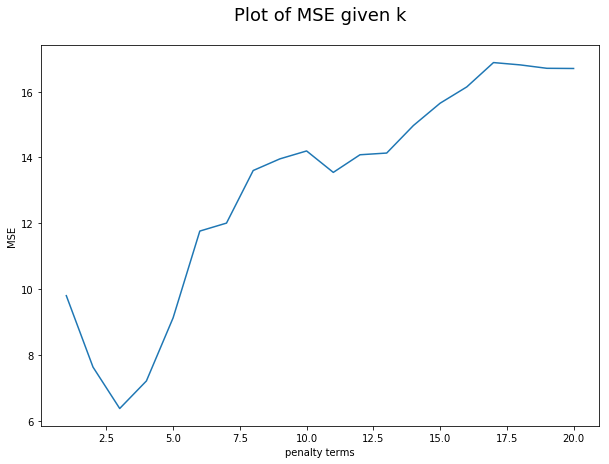

In [2202]:
k_terms=np.linspace(1,20,20)
k_terms=k_terms.astype(int)
mses_knn,k_best=find_k(k_terms,X_fold[2],y_fold[2],X_fold_test[2],y_fold_test[2])
plt.figure(figsize=(10,7))
plt.plot(k_terms,mses_knn)
plt.xlabel('penalty terms')
plt.ylabel('MSE')
plt.title('Plot of MSE given k', y=1.05, fontsize=18)
plt.show()

Indeed, this graph shows that the optimal k (here 3) minimises the MSE for this fold. We can also interpret that too large k leads to a poor MSE probably because the variance increases (due to overfitting) and too small k probably leads to unbiased predictions $\hat{y}$. 

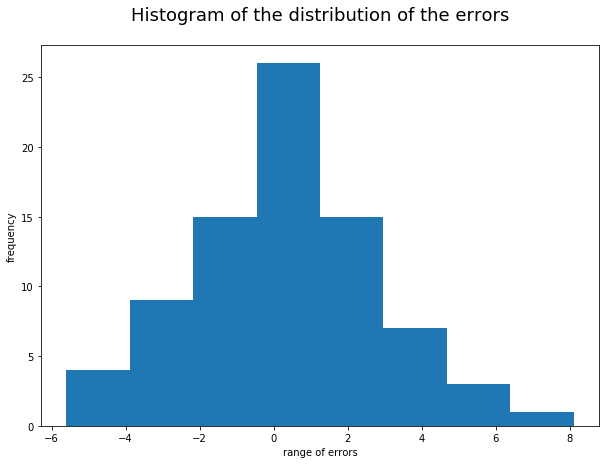

In [2203]:
y_pred=reg_predict(X_fold_test[2], X_fold[2], y_fold[2], 3)
error=y_pred-y_fold_test[2]
plt.figure(figsize=(10,7))
plt.hist(error,8)
plt.xlabel('range of errors')
plt.ylabel('frequency')
plt.title('Histogram of the distribution of the errors', y=1.05, fontsize=18)
plt.show()

From the histogram, we can deduce that the errors seem to be normally distributed around zero. Indeed, the mean of the errors seems to be close to zero:

In [2140]:
#mean of the errors
np.mean(error)

0.23333333333333361

With further research, I have come to the conclusion that in regression models the prediction errors need to be normally distributed, which is the case here. For more precision, we could run tests to check normality but we will

#### 1.3.2

In [2206]:
#choose best k with the average of mse
def find_model_knn(X,X_test,y,y_test,k_terms):
    k_best_all=np.zeros(5)
    mses_knn_mean=0
    mse_in=[]
    mse_out=[]
    
    X_fold,X_fold_test,y_fold,y_fold_test=split_5fold(X,y,5)
    for i in range(5):
        mses_knn,k_best_all[i]=find_k(k_terms,X_fold[i],y_fold[i],X_fold_test[i],y_fold_test[i]) #best paramater for this fold
        mses_knn_mean=mses_knn_mean+mses_knn #calculate mean of mse_knn over 5 fold
    mses_knn_mean=mses_knn_mean/5
    opt_mse_index=np.argmin(mses_knn_mean)
    k_best_mean=k_terms[opt_mse_index] #best parameter for all 5 folds
    return k_best_mean,k_best_all,mses_knn_mean

In [2215]:
k_best_mean,k_best_all,mses_knn_mean=find_model_knn(X,X_test,y,y_test,k_terms)
print('The optimal value k is', k_best_mean)

The optimal value k is 3


Our optimal knn model has $k^{*}$ = 3 (for probably similar reasons to the model we trained in one fold). 

In [2216]:
def mse_knn_in_out(X,X_test,y,y_test,k_best):
    mse_in= MSE_knn(reg_predict(X, X, y, k_best), y) #in sample mse with training 
    mse_out=MSE_knn(reg_predict(X_test, X, y, k_best), y_test) #out sample mse test data
    return mse_in, mse_out

In [2217]:
k_best_mean,k_best_all,mse_knn_mean=find_model_knn(X,X_test,y,y_test,k_terms)
mse_in, mse_out=mse_knn_in_out(X,X_test,y,y_test,k_best_mean)
print('MSE of knn model:', 'in-sample', mse_in, 'out-of-sample', mse_out)

MSE of knn model: in-sample [[4.98090484]] out-of-sample [[12.29302832]]


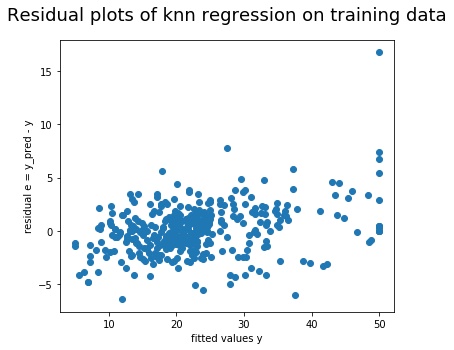

In [2212]:
y_pred=reg_predict(X, X, y, k_best_mean)
e = y-y_pred #residual
plt.figure(figsize=(6,5))
plt.scatter(y,e)
plt.xlabel('fitted values y')
plt.ylabel('residual e = y_pred - y')
plt.title('Residual plots of knn regression on training data', y=1.05, fontsize=18)
plt.show()

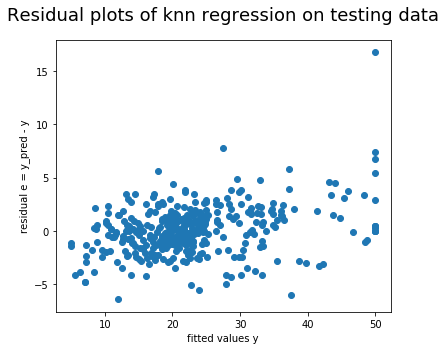

In [2213]:
y_pred_test=reg_predict(X_test, X, y, k_best_mean)
e = y-y_pred #residual
plt.figure(figsize=(6,5))
plt.scatter(y,e)
plt.xlabel('fitted values y')
plt.ylabel('residual e = y_pred - y')
plt.title('Residual plots of knn regression on testing data', y=1.05, fontsize=18)
plt.show()

Comparing these plots with the previous residual plots, we see that they are more equally distributed:
- the residual plot on training data is nearly uniformly distributed (as required) which explains the very low in-sample MSE and
- the residual plot on test data is more uniformly distributed than the previous ones explaining the reduction of out-of-sample MSE 

Therefore, considering that our data is homogeneous, we can conclude that the assumption of linear regression is not very appropriate for our data and therefore our 17 predictors are nonlinear. And if we consider that our data is not homogeneous, the kNN model, deals well with the large outliers (since they don't appear in the residual plots).

### Conclusion of regression

We can summarise the performances of our models in the table below, to prove that the knn regresion model (non-linear regression model) leads to the best quality of fitting of the training and testing data. The results supports the argument that our predictors are non linear. 

| Regression models | in-sample MSE | out-sample MSE |
| --- | --- | --- |
|Linear regression | 23.89871 | 26.40392 |
|Ridge regression | 24.63513 | 25.07344 |
|kNN regression | 4.98090 | 12.29303 |

## 2 Classification

In this task, we are asked to use a dataset of a collection of information on credit applications (to a bank) to do a binary calssification task. We use the 11 features of each applicant as predictors to predict the binary target variable: is the application successful or not. Let's have a look at the given data and run a brief exploratory data analysis.

Lets import the files to have a first look at the data and its configuration. The last column is our binary target value and the rest of the columns are the predictors.

In [2604]:
classification_train = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/classification_train.csv')
classification_test = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/classification_test.csv')
classification_train.head(11)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.1620,0.25,0.3630,0.25,0.00,0.000,0.333,0.333,0.2680,1.000,1.0,0.0
1,0.4710,0.50,0.8590,0.00,0.00,0.333,0.667,0.667,0.4290,1.000,0.0,1.0
2,0.1180,0.00,0.1380,0.00,1.00,0.333,1.000,0.333,0.2680,0.667,0.0,1.0
3,0.4710,0.50,0.1760,0.00,1.00,1.000,0.333,0.667,0.4110,0.667,0.0,0.0
4,0.6470,0.00,0.2400,0.00,1.00,0.667,1.000,1.000,0.0893,0.667,0.0,0.0
5,0.1180,0.75,0.0602,0.00,0.50,1.000,0.333,0.000,0.4290,0.333,0.0,1.0
6,0.2060,1.00,0.2780,0.00,1.00,0.333,1.000,1.000,0.3040,1.000,1.0,1.0
7,0.0588,0.50,0.0362,0.00,0.25,0.667,0.333,0.000,0.1250,0.667,1.0,1.0
8,0.1180,1.00,0.0248,0.00,0.50,1.000,0.333,0.667,0.2320,0.667,0.0,1.0
9,0.1180,0.50,0.1000,0.25,0.50,1.000,0.333,0.000,0.1610,0.667,0.0,1.0


In [2605]:
X=pd.DataFrame(classification_train.drop(['11'],axis=1))
y=classification_train[['11']]
X=X.values
y=y.values
X_test=pd.DataFrame(classification_test.drop(['11'],axis=1))
y_test=classification_test[['11']]
X_test=X_test.values
y_test=y_test.values

The data is finally ready to be used for binary classification to predict the target values. We will compare the results of 3 different model: Logistic regression classifier, Random forest, and Suport vector machines (SVM). All 3 models will be trained using the training data and tested on the test data. To compare the models we will compare their respective performance / accuracy on the training data and test data. As opposed to the MSE in regresssion, here we aim to maximise the accuracy results. 

### 2.1 Logistic regression 

A logistic regression classifier, is a linear model for classification, used here for binary classification to assign a predicted value of 0 or 1 for the success or not of the credit application to the bank. We will explain why the term logistic *regression* is used by examining the logistic function first:
$$
f(x) = \frac{1}{1+e^{-x}}
$$
The logistic regression model assumes that the logit function is a linear combination of the predictor variables:
$$
X^{T} \beta = \mathrm{log} \frac{P(y=1)}{1-P(y=1)}
$$
By rearanging, the terms we get the probability of success, as the logistic function
$$
P(y=1) = \frac{1}{1+ \mathrm{e}(-X^{T} \beta)}
$$
Therefore, the model assumes that the target value y follows a Bernoulli random variable with probability of success $P(y=1)$ defined above to be the logistic function.
Let's summarise the logistic regression algorithm in steps:

- step (1) optimise the linear parameters $\beta$ from the data, we will maximise the loss function, given by:
$$
\mathcal{L} = \underset{i=1}{\sum}^{N} \mathrm{log} h_{\beta} (X_i) - (1-y_i)(X_i)^{T} \beta
$$
Since this is a convex optimisation, we can find the optimal $\beta^{*}_{\mathrm{log}}$ with gradient descent.
- step (2) define the classifier for a new point depending on a decision threshold $\tau$ (that we will tune), as:
$$
P(y=1 | x^{\mathrm{in}}) > \tau \implies  x^{\mathrm{in}} \in \{1\}
$$

#### 2.1.1

Let's start with splitting the data into 5-fold to implement the logistic regression algorithm on each fold later on.

In [2273]:
X_fold,X_fold_test,y_fold,y_fold_test=split_5fold(X,y,5)

Now, the next function is the logistic function that we will apply to the linear combination $X^{T} \beta$:

In [2607]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

To start the optimisation in step (1), we initialise the parameters $\boldsymbol \beta$ and $\beta_0$ randomly or with zeros and update it iteravely using the gradient descent method.

In [2608]:
def initialise(d):
    beta = np.zeros(shape=(d, 1), dtype=np.float32)
    beta_0 = 0
    assert(beta.shape==(d, 1))
    assert(isinstance(beta_0, float) or isinstance(beta_0, int))
  
    return beta, beta_0

In [2609]:
def predict_log(X, beta, beta_0):
    y_log = logistic(beta.T @ X + beta_0) #logistoc function to X.T@beta
    return y_log

Now to start the gradient descent, we define the cost function (as in the lecture notes):
$$
\mathcal L = - \frac{1}{n} \sum_{i=1}^n y^{(i)} \log(\hat{y}_{\text{log}}^{(i)}) + (1-y^{(i)}) \log (1-\hat{y}_{\text{log}}^{(i)}) \, .
$$
with derivatives with respect to $\boldsymbol \beta$ and $\beta_0$:
$$
\frac{\partial \mathcal L}{\partial \boldsymbol \beta} = \frac{1}{n} \sum_{i=1}^n ( y^{(i)} - \hat{y}_{\text{log}}^{(i)}) X^{(i)}
$$
 
$$
\frac{\partial \mathcal L}{\partial \beta_0} = \frac{1}{n} \sum_{i=1}^n ( y^{(i)} - \hat{y}_{\text{log}}^{(i)})
$$


We implement the cost function and its derivatives in the next cell as part of a larger operation which we shall call `propagate`.

In [2610]:
def propagate(X, y, beta, beta_0):
    n = X.shape[1]
    y_log = predict_log(X, beta, beta_0) #calculate log function for our betas
    # cost function
    cost = (-1) * np.mean(np.multiply(y, np.log(y_log)) + np.multiply(1-y, np.log(1 - y_log)), axis=1) 
    # derivatives
    dbeta = (1/n) * X @ np.transpose(y_log - y)  # gradient of the loss wrt beta
    dbeta_0 =  np.mean((y_log - y)) # gradient of the loss wrt beta_0
    
    #make sure the derivative have the correct shape
    assert(dbeta.shape==beta.shape)
    assert(dbeta_0.dtype==float)
    cost = np.squeeze(cost)
    assert(cost.shape==())
  
    # store gradients in a dictionary
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
    return grads, cost

The optimise function implements the gradient descent:
- set a learning rate $\eta$
- initialise the parameters we will update through iterations $\beta$ and $\beta_0$ 
- update the parameters such that the parameters tend to the opposite direction of the derivatives (to attein the minimum)
$$
\beta = \beta - \eta \frac{\partial \mathcal L}{\partial \boldsymbol \beta}
$$
$$
\beta_0 = \beta - \eta \frac{\partial \mathcal L}{\partial \boldsymbol \beta_0}
$$
(repeat this step until $\frac{\partial \mathcal L}{\partial \boldsymbol \beta}$ and $\frac{\partial \mathcal L}{\partial \boldsymbol \beta_0}$ is small enough)

In [2611]:
def optimise(X, y, beta, beta_0, num_iterations, learning_rate, print_cost=False):
    
    costs = [] #store the costs computed for each iteration
    
    for i in range(num_iterations):
    # calculate cost and gradients
        grads, cost = propagate(X, y, beta, beta_0)  #
        # retrieve derivatives from grads
        dbeta = grads["dbeta"]
        dbeta_0 = grads["dbeta_0"]
      
        # updating procedure
        beta = beta - learning_rate * dbeta  # 
        beta_0 = beta_0 - learning_rate * dbeta_0  #
      
        # record the costs
        if i % 100 == 0:
            costs.append(cost)
      
        # print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("cost after iteration %i: %f" %(i, cost))
  
    # save parameters and gradients in dictionary
    params = {"beta": beta, "beta_0": beta_0}
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
    return params, grads, costs

We have introduced our first hyperparameter $\eta$ in the gradient descent and now our second hyperparameter ($\tau$, decision threshold) is used in the prediction step (2).

In [2612]:
def predict(X_test, beta, beta_0, dec):
    n = X_test.shape[1]
    y_pred = np.zeros((1,n))
    beta = beta.reshape(X_test.shape[0], 1)
  
    # compute vector y_log predicting the probabilities
    y_log = predict_log(X_test, beta, beta_0)
  
    for i in range(y_log.shape[1]):
      
        # convert probabilities y_log to actual predictions y_pred
        if y_log[0, i] > dec:
            y_pred[0, i] = 1  #
        else:
            y_pred[0, i] = 0  #
  
    assert(y_pred.shape==(1, n))
  
    return y_pred

In [2613]:
def model(X_train, y_train, X_test, y_test, dec, num_iterations, learning_rate, print_cost=False):
    # initialize parameters with zeros
    X_train=X_train.T
    X_test=X_test.T
    y_train=y_train.T
    y_test=y_test.T
    
    beta, beta_0 = initialise(X_train.shape[0])

    # gradient descent
    parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, num_iterations, learning_rate, print_cost=False)

    # retrieve parameters beta and beta_0 from dictionary "parameters"
    beta = parameters["beta"]
    beta_0 = parameters["beta_0"]

    # predict test and train set examples
    y_pred_test = predict(X_test, beta, beta_0, dec)
    y_pred_train = predict(X_train, beta, beta_0, dec)
    
    # saving all information
    d = {"costs": costs, "y_pred_test": y_pred_test, "y_pred_train": y_pred_train, "beta": beta, "beta_0": beta_0, "learning_rate": learning_rate, "num_iterations": num_iterations}
  
    return d

Now, to tune both hyperparameters, we use a grid search over a range of value of the learning rate and the decision threshold:
- we train the logistic regression model on all pair of values 
- calculate and store in a matrix the accuracy of each model with the formula: mean_accuracy = $1 - \frac{1}{N} \underset{i=1}{\sum}^{N} |\hat{y}^{(i)} - y^{(i)} |$ 
- find the pair of hyperparameters ($\tau^{*}$, $\eta^{*}$) that maximises the accuracies of the models

In [2614]:
def find_dec_learn(dec_terms,X_train,y_train,X_test,y_test,num_iterations,learn_terms):
    accuracy=np.zeros((len(dec_terms),len(learn_terms)))
    for i in range(len(dec_terms)):
        dec=dec_terms[i]
        for j in range(len(learn_terms)):
            learn=learn_terms[j]
            d=model(X_train, y_train, X_test, y_test, dec, num_iterations, learn, print_cost=False)            
            accuracy[i:i+1,j:j+1]=1-np.mean(np.abs(d["y_pred_test"] - y_test.T))
    max_ac=np.argmax(accuracy)
    index=[math.floor((max_ac)/len(learn_terms)),(max_ac)%len(learn_terms)] #this is the quotient and rest of max_ac/number of columns of accuracy
    dec_best=dec_terms[index[0]]
    learn_best=learn_terms[index[1]]
    accuracy_best=accuracy[index[0]:index[0]+1,index[1]:index[1]+1]
    return accuracy_best,accuracy,dec_best,learn_best

Let's demonstrate this by applying it to one of the 5 folds, and measuring the accuracy with the corresponding validation subset.

In [2615]:
dec_terms=np.linspace(0.25,1,10)
learn_terms=np.linspace(0.001,0.05,10)
num_iterations=5000
accuracy_best,accuracy,dec_best,learn_best=find_dec_learn(dec_terms,X_fold[1],y_fold[1],X_fold_test[1],y_fold_test[1],num_iterations,learn_terms)

In [2616]:
print('The optimal decision threshold is', dec_best)
print('The optimal learning rate is', learn_best)

The optimal decision threshold is 0.25
The optimal learning rate is 0.001


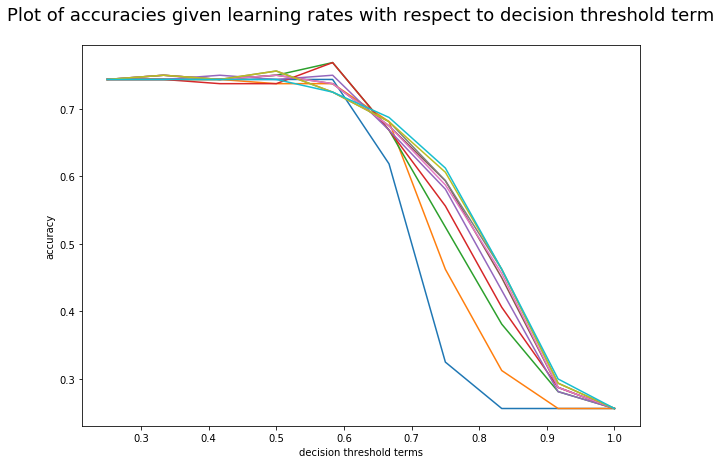

In [2284]:
plt.figure(figsize=(10,7))
plt.plot(dec_terms,accuracy)
plt.xlabel('decision threshold terms')
plt.ylabel('accuracy')
plt.title('Plot of accuracies given learning rates with respect to decision threshold term', y=1.05, fontsize=18)
plt.show()

These curves corresponds to the accuracies evaluated at different learning rates $\eta$ with respect to the decision threshold, and we clearly see the maximum is attained at aroung $\tau \approx 0.6$. 

We will now repeate this method to the 5 folds and take the optimal hyperparameters to be the parameters that maximise the mean of the 5 obtained accuracies. 

In [2286]:
import math
#5-fold cross validation
def find_model_log(X,y,dec_terms,learn_terms,num_iterations=5000):
    # run the model with 2 for loops to chose hyperparameters learning rate and decision threshold 
    dec_best=[]
    learn_best=[]
    accuracy_mean=np.zeros((len(dec_terms),len(learn_terms)))
    accuracy_best=[]
    
    X_fold,X_fold_test,y_fold,y_fold_test=split_5fold(X,y,5)
    for i in range(5):
        accuracy_best_i,accuracy,dec_best_i,learn_best_i=find_dec_learn(dec_terms,X_fold[i],y_fold[i],X_fold_test[i],y_fold_test[i],num_iterations,learn_terms)
        accuracy_best.append(accuracy_best_i)
        dec_best.append(dec_best_i)
        learn_best.append(learn_best_i)
        
        accuracy_mean = accuracy_mean + accuracy
    accuracy_mean=accuracy_mean/5 #calculate mean of accuracy over 5 fold
    max_ac=np.argmax(accuracy_mean)
    index=[math.floor((max_ac+1)/len(learn_terms)),(max_ac+1)%len(learn_terms)]
    #best model over the average of 5 accuracies
    dec_best_mean=dec_terms[index[0]] 
    learn_best_mean=learn_terms[index[1]]
    accuracy_best_mean=accuracy[index]
    return dec_best_mean,learn_best_mean,accuracy_best_mean,accuracy_best,dec_best,learn_best

In [2287]:
# run the model with 2 for loops to chose hyperparameters learning rate and decision threshold 
dec_term=np.linspace(0.25,1,10)
learn_terms=np.linspace(0.001,0.05,10)
dec_best_mean,learn_best_mean,accuracy_best_mean,accuracy_best,dec_best,learn_best=find_model_log(X,y,dec_terms,learn_terms)


In [2288]:
print('The optimal decision threshold', dec_best_mean)
print('The optimal learning rate', learn_best_mean)

The optimal decision threshold 0.5833333333333333
The optimal learning rate 0.017333333333333333


#### 2.1.2

We have therefore, obtained the otpimal hyperparameters of our logistic regression model. Let's use it now to evaluate its accuracy with training and test data. 

In [2359]:
def mean_accuracies_in_out(X,y,X_test,y_test,dec_best_mean,learn_best_mean, num_iterations, print_cost=False):            
    d=model(X, y, X_test, y_test, dec_best_mean, num_iterations, learn_best_mean, print_cost=False)
    accuracy_in=1-np.mean(np.abs(d["y_pred_train"] - y.T))
    accuracy_out=1-np.mean(np.abs(d["y_pred_test"] - y_test.T))
    y_pred=d["y_pred_train"]
    y_pred_test=d["y_pred_test"]
    return accuracy_in,accuracy_out,y_pred,y_pred_test

In [2617]:
accuracy_in,accuracy_out,y_pred,y_pred_test=mean_accuracies_in_out(X,y,X_test,y_test,dec_best_mean,learn_best_mean, num_iterations, print_cost=False)

In [2618]:
print('The in-sample accuracy', 100*accuracy_in)
print('The out-of-sample accuracy', 100*accuracy_out)

The in-sample accuracy 73.875
The out-of-sample accuracy 71.50000000000001


These accuracies are pretty satisfying: it is coherent that the training data gives a better accuracy than the accuracy on the test data. Let's explain in more detail if the errors are of type I or type II using the confusion matrix above.

In [2619]:
def confusion_matrix_lr(y_preds,y_test):
    #when positive is 1 and negative is 0
    TP=np.float(np.sum(y_preds.T+y_test==2)) #true positives
    TN=np.float(np.sum(y_preds.T+y_test==0)) #true negatives
    FP=np.sum(y_preds==1)-TP #false positives = positives - true positives
    FN=np.sum(y_preds==0)-TN #false negatives = negatives - true negatives
    return TP,TN,FP,FN

In [2620]:
TP,TN,FP,FN = confusion_matrix_lr(y_pred,y)
TP_test,TN_test,FP_test,FN_test = confusion_matrix_lr(y_pred_test,y_test)

In [2621]:
print('Confusion matrix for training data')
print('TP=', TP, 'FP=', FP)
print('FN=', FN,'TN=',TN)
print('in-sample score', (TN+TP)/800)
print('in-sample F1 score', (2*TP)/(2*TP + FP + FN))

Confusion matrix for training data
TP= 501.0 FP= 147.0
FN= 62.0 TN= 90.0
in-sample score 0.73875
in-sample F1 score 0.8274153592072667


In [2624]:
print('Confusion matrix for test data')
print('TP=', TP_test, 'FP=', FP_test)
print('FN=', FN_test,'TN=',TN_test)
print('out-of-sample score', (TN_test+TP_test)/200)
print('out-of-sample F1 score', (2*TP_test)/(2*TP_test + FP_test + FN_test))

Confusion matrix for test data
TP= 118.0 FP= 38.0
FN= 19.0 TN= 25.0
out-of-sample score 0.715
out-of-sample F1 score 0.8054607508532423


Therefore, to conclude on the performance of our model: from the confusion matrices, it performes better in our training data than the test data, but keeping relatively good predictions. When the mean accuracy we have calculated doesn't quantify the number of each error types, the confusion matrix tells us that the model gives more of type I error (false positives) than type II (false negatives). Let's explore another method: the random forest and compare the performances.

### 2.2 Random forest

We start by reloading the classification data, as below.

In [2628]:
classification_train = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/classification_train.csv')
classification_test = pd.read_csv (r'/Users/camillekeisser/Documents/IMPERIAL/YEAR 3/Data Science/Coursework 1/classification_test.csv')

In [2629]:
X=pd.DataFrame(classification_train.drop(['11'],axis=1),)
y=classification_train['11']
X_train=X.values
y_train=y.values

X_test=pd.DataFrame(classification_test.drop(['11'],axis=1))
y_test=classification_test['11']
X_test=X_test.values
y_test=y_test.values

y_train[y_train == 0] = -1 #set negative to be -1 
y_test[y_test == 0] = -1

y_train = y_train.astype(float)
y_test = y_test.astype(float)

#### 2.2.1

To explain how the random forest classification model, we first need to explain how a decision tree works. 
Decision trees are a non-parametric supervised learning method whose goal is to create a model that predicts the value of the label by learning simple decision rules inferred from the data features. We can interpret these learnt decisions as a set of _if-then-else_ decision rules. In general the deeper the tree (the more learnt decisions), the more precise the decision rules and the fitter the model, but we need to watch out overfitting. A random forest is a set of decision trees with a certain randomness coming from the sample of feature randomly chosen at each spliot and the sample of observations randomly chosen to train each tree.   
We will firstly, have a look at how a tree is built:
- step (1) calculate the cross entropy for each vector y to quantify information
- step (2) chose the best feature and value to split the data (the optimal split minimises the value of the cross-entropy)
- step (3) repeat the splitting step until some conditions are met: maximum depth of tree, minimum size of leaf, ... 

In our lectures, we have learnt how the cross entropy of the labels $\boldsymbol y$ is calculated:
$$
\text{CE}(P(Y =\boldsymbol y)) = \sum_{i=1}^N P(Y=y) \mathrm{log}(1 - P(Y=y))
$$

Our data is set to have  uniform sample weights, but the next code calculates the cross entropy for y considering potentially samples with different weights `sample_weights`.

In [2630]:
import math
# cross-entropy
def cross_entropy(y, sample_weights=None):

    if sample_weights is None: #for uniform distributed data
        sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
    CE = 0 #initialize cross entropy
    num = y.shape[0]  # number of labels
    label_counts = {}  # caculate different labels in y，and store in label_counts
    for i in range(num):
        if y[i] not in label_counts.keys():
            label_counts[y[i]] = 0
        label_counts[y[i]] += sample_weights[i]
  
    for key in label_counts:
        prob = float(label_counts[key]) / float(np.sum(sample_weights))
        CE += (1-prob) * math.log(prob) # formula from lecture notes exchanging p and q

    return CE

Next is the function that splits the data set with respect to the given column and value. The idea is to find the optimal value and column to minimise the cross-entropy.

In [2631]:
def split_dataset(X, y, column, value, sample_weights=None):
  region1 = []
  region2 = []
  featVec = X[:, column]  
  for i in range(len(featVec)):
      if featVec[i] <= value:
          region1.append(i)
      else:
          region2.append(i)     
  X1 = X[region1,:]
  y1 = y[region1]
  X2 = X[region2,:]
  y2 = y[region2]
  # returns list of splits, implemente das tuples. A few ways to do this.
  if (sample_weights is None):
      return [(X1, y1), (X2, y2)]
  else:
      return [(X1, y1, sample_weights[region1]) , (X2, y2, sample_weights[region2])]


  region1 = []
  region2 = []
  featVec = X[:, column]  
  for i in range(len(featVec)):
      if featVec[i] <= value:
          region1.append(i)
      else:
          region2.append(i)     
  X1 = X[region1,:]
  y1 = y[region1]
  X2 = X[region2,:]
  y2 = y[region2]
  # returns list of splits, implemente das tuples. A few ways to do this.
  if (sample_weights is None):
      return [(X1, y1), (X2, y2)]
  else:
      return [(X1, y1, sample_weights[region1]) , (X2, y2, sample_weights[region2])]

To solve the otpimisation problem: $\underset{(j,s)}{\mathrm{min}} CE(P( Y \in R_{\alpha}))$
we write the function below that reduces the cross-entropy as much as possible give j and s. 

In [2632]:
def cross_entropy_purification(X, y, column, value, sample_weights=None):
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
    new_impurity = 0
    old_cost = cross_entropy(y, sample_weights)
  
    unique_vals = np.unique(X[:, column])
    new_cost = 0.0
    #split the values of i-th feature and calculate the cost 
    for sub_X, sub_y, sub_sample_weights in split_dataset(X, y, column, value, sample_weights): #split data for every unique value
        prob = np.sum(sub_sample_weights) / float(np.sum(sample_weights))
        new_cost += prob * cross_entropy(sub_y, sub_sample_weights) #update the cost
    new_impurity = old_cost - new_cost # information gain

    return new_impurity

Proceed to the minimisation step.

In [2633]:
def choose_best_feature(X, y, max_feature, sample_weights=None):
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
  n_features = max_feature
  best_split=None
  best_gain_cost = -1e15
  N,D=X.shape
  chosen_features=np.sort(np.array(random.sample(range(D),max_feature)))
    
  for i in chosen_features:
      unique_vals = np.sort(np.unique(X[:, np.int(i)]))
      for v in unique_vals:
          info_gain_cost = cross_entropy_purification(X, y, np.int(i), v, sample_weights )
          #print(i,v,info_gain_cost)
          if info_gain_cost > best_gain_cost:
              best_gain_cost = info_gain_cost
              best_split = (np.int(i),v)               
  return best_split

The majority_vote function takes now as input a variable y and returns the majority label $\hat{y}$ of its region. 

In [2653]:
def majority_vote(y, sample_weights=None):
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
    majority_label = y[0]

    dict_num = {}
    for i in range(y.shape[0]):
        if y[i] not in dict_num.keys():
            dict_num[y[i]] = sample_weights[i]
        else:
            dict_num[y[i]] += sample_weights[i]
  
    majority_label = max(dict_num, key=dict_num.get)
    # end answer
    return majority_label

We now build the tree by storing all the splits and the majority label of the last splits.

In [2654]:
def build_tree(X, y, feature_names, max_depth, min_samples_leaf,depth, max_feature, sample_weights=None):
  """
  Build the decision tree according to the data.
  """
  mytree = dict()
  weight_start=np.array([np.sum(y==-1),np.sum(y==1)]) #used later on for empty leaves
  # include a clause for the cases where (i) no feature, (ii) all lables are the same, 
  # (iii) depth exceed, or (iv) X is too small
  if len(X)==0: 
    mytree = {'node':'leaf' , 'label': random.choices((-1,1), weight_start)[0] } #when the leaf is empty generate a weighted random
  elif len(feature_names)==0 or len(np.unique(y))==1 or depth>=max_depth or len(X)<=min_samples_leaf:
    mytree = {'node':'leaf' ,  'label': majority_vote(y, sample_weights) }
  else:
    best_feature_idx, value = choose_best_feature(X, y, max_feature, None)
    best_feature_name = feature_names[best_feature_idx]
    feature_names = feature_names[:]
    splits = split_dataset(X, y, best_feature_idx, value, sample_weights)
    mytree = { 'node':'split', 'feature_name':best_feature_name, 'value':value }
    mytree['left'] = build_tree(splits[0][0], splits[0][1], feature_names, max_depth, min_samples_leaf, depth+1, max_feature, splits[0][2])
    mytree['right'] = build_tree(splits[1][0], splits[1][1], feature_names, max_depth, min_samples_leaf, depth+1,max_feature, splits[1][2]) 

  return mytree

In [2655]:
def train(X, y, max_depth=10, min_samples_leaf=3, depth=1, max_feature=5, sample_weights=None):
  """
  Build the decision tree according to the training data.
  """
  if sample_weights is None:
      sample_weights = np.ones(X.shape[0]) / X.shape[0] # uniform weights
  else:
      sample_weights = np.array(sample_weights) / np.sum(sample_weights)

  feature_names = range(11)
  X = np.array(X)
  y = np.array(y)
  tree = build_tree(X, y, feature_names,  max_depth=10, min_samples_leaf=3, depth=1, max_feature=5, sample_weights=sample_weights)
  return tree

Let's train a tree to have an idea of its structure. The aim is to classify new input points and assign the majority class (1 or -1) of the points inside the corresponding leaf. 

In [2656]:
# fit the decision tree with training data
tree = train(X_train, y_train,max_depth=10, min_samples_leaf=3, depth=1, max_feature=5)
tree

{'node': 'split',
 'feature_name': 3,
 'value': 0.25,
 'left': {'node': 'split',
  'feature_name': 0,
  'value': 0.33799999999999997,
  'left': {'node': 'split',
   'feature_name': 0,
   'value': 0.0441,
   'left': {'node': 'split',
    'feature_name': 9,
    'value': 0.667,
    'left': {'node': 'split',
     'feature_name': 3,
     'value': 0.25,
     'left': {'node': 'split',
      'feature_name': 0,
      'value': 0.0441,
      'left': {'node': 'split',
       'feature_name': 3,
       'value': 0.25,
       'left': {'node': 'split',
        'feature_name': 0,
        'value': 0.0441,
        'left': {'node': 'split',
         'feature_name': 0,
         'value': 0.0441,
         'left': {'node': 'leaf', 'label': 1.0},
         'right': {'node': 'leaf', 'label': 1}},
        'right': {'node': 'leaf', 'label': 1}},
       'right': {'node': 'leaf', 'label': 1}},
      'right': {'node': 'leaf', 'label': 1}},
     'right': {'node': 'leaf', 'label': 1}},
    'right': {'node': 'leaf', 'lab

Now that we have our tree, it can be used to classify data by finding the region where a new point $x_{in}$ falls and  assign its predicted target value $\hat{y}$ to be the majority value of the corresponding region. 

In [2637]:
def classify(tree, x):
  """
  Classify a single sample with the fitted decision tree.
  """
  if tree['node'] == 'leaf':
    return tree['label']
  else:
    feature_name = tree['feature_name']
    v = x[feature_name]
    if (v <= tree['value']):
        return classify(tree['left'],x)
    else:
        return classify(tree['right'],x)

In [2638]:
def predict(X_train,y_train,X_test,max_depth=10, min_samples_leaf=3, depth=1, max_feature=8):
    tree = train(X_train, y_train,max_depth, min_samples_leaf, depth, max_feature)
    if len(X_test.shape)==1:
        return classify(tree, X_test)
    else:
        results=[]
        for i in range(X_test.shape[0]):
            results.append(classify(tree, X_test[i]))
        y_pred=np.array(results)
        return y_pred,tree

To evaluate the quality of the decision tree model we measure the accuracy, given by:
$$
accuracy = \frac{TP+TN}{TP+TN+FP+FN} 
$$

In [2639]:
def score(X_train,y_train,X_test,y_test,max_depth=10, min_samples_leaf=3, depth=1, max_feature=5):
    y_pred = predict(X_train,y_train,X_test,max_depth=10, min_samples_leaf=3, depth=1, max_feature=5) 
    return np.float(sum(y_pred==y_test)) / float(len(y_test))

#### Build random forest
We will now build a forest following the next steps, mentioned in the notes:
- step (1) bootstrapping: generate B random samples with replacement (equivalent to the B decision trees constituting the forest).
- step (2) ensemble of decision trees models: train each sample on a subset of randomly chosen features / preidctors.
- step (3) aggregating: to choose the region and its majority label y, we chose the class with the highest average of probability vector

In [2640]:
def random_forest(X_train, y_train, X_test, max_nb_tree, max_depth=10, min_samples_leaf=3, depth=1, max_feature=8):
    forest=[]
    N,D=X_train.shape
    y_pred_mean=np.zeros(X_test.shape[0])
    for i in range(max_nb_tree):
        X_b=np.zeros(X_train.shape)
        y_b=np.zeros(y_train.shape)
        for j in range(N):
            idx=random.randint(0,N-1)
            X_b[j]=X_train[idx]
            y_b[j]=y_train[idx]
        y_pred,tree=predict(X_b,y_b,X_test,max_depth, min_samples_leaf, depth, max_feature)
        forest.append(tree)
        y_pred_mean=y_pred_mean+y_pred
    y_pred_mean[y_pred_mean<0]=-1
    y_pred_mean[y_pred_mean>=0]=1
    return y_pred_mean

##### Hyperparameter tuning 

We are looking for 3 hyperparameters that have a major role in the definition of our random forest model:
- number of decision trees: it limits the computational complexity and the repeatition of trees
- the depth of trees: it avoids overfitting
- the maximum number of descriptors randomly chosen at each split: it balances out the randomness of each tree inside the forest

Therefore we need to proceed to a 3-D looking grid search. Indeed, we will create a list of 2D matrices and find the maximum accuracy over all possible model resulting from the combination of the 3 hyperparameters. 

In [2641]:
#3 hyperparameters
def find_hyperparameters(X_train, y_train, X_test, y_test, nb_trees_terms, max_depth_terms, max_feat_terms):
    scores=[]
    scores_best=np.zeros(len(nb_trees_terms))
    max_depth_best=np.zeros(len(nb_trees_terms))
    max_feature_best=np.zeros(len(nb_trees_terms))
    for i in range(len(nb_trees_terms)):
        max_nb_tree=nb_trees_terms[i]
        score=np.zeros((len(max_depth_terms),len(max_feat_terms)))
        for j in range(len(max_depth_terms)):
            max_depth=max_depth_terms[j]
            for k in range(len(max_feat_terms)):
                max_feature=max_feat_terms[k]
                y_pred_rf=random_forest(X_train, y_train, X_test, max_nb_tree=max_nb_tree, max_depth=max_depth, min_samples_leaf=3, depth=1, max_feature=max_feature)
                score[j:j+1,k:k+1]=np.float(sum(y_pred_rf==y_test)) / float(len(y_test))
        max_ac=np.argmax(score)
        index=[math.floor((max_ac)/len(max_feat_terms)),(max_ac)%len(max_feat_terms)] #this is the quotient and rest of max_ac/number of columns of accuracy
        max_depth_best[i]=max_depth_terms[index[0]]
        max_feature_best[i]=max_feat_terms[index[1]]
        scores.append(score)
        scores_best[i]=(score[index[0]:index[0]+1,index[1]:index[1]+1])
    index_i=np.argmax(scores_best)
    max_nb_tree_best=nb_trees_terms[index_i]
    max_depth_best=max_depth_best[index_i]
    max_feature_best=max_feature_best[index_i]
    return scores_best,score,max_nb_tree_best,max_depth_best,max_feature_best

#### 5-fold cross-validation

To obtain our final random forest model, we use the 5-fold cross-validation. Similarly to the knn model, we cannot take the average of the 5 optimal hyperparameters since our hyperparameters (number of decision trees, depth of trees, and maximum number of descriptors randomly chosen at each split) are all discrete parameters. Therefore, we simply select the combination of the 3 hyperparameters that maximises the accuracy of the model with respect to the validation set.

In [2642]:
def split_5fold_class(X,y,T):
    N, D = X.shape
    t=math.floor(N/T)
    X=X[:t*T]
    y=y[:t*T]
    X_fold=[]
    y_fold=[]
    X_fold_test=[]
    y_fold_test=[]
    for i in range(5):
        X_fold.append(np.delete(X,np.array(range(t*i,t*(i+1))),0))
        y_fold.append(np.delete(y,np.array(range(t*i,t*(i+1))),0))
        X_fold_test.append(X[t*i:t*(i+1)])
        y_fold_test.append(y[t*i:t*(i+1)])
    return X_fold,X_fold_test,y_fold,y_fold_test

In [2643]:
def find_model_rf(X_train, y_train, nb_tree_terms, max_depth_terms, max_feat_terms):
    # run the model with 3 for loops to chose hyperparameters
    score_mean_3=[]
    scores_mean_best=np.zeros(len(nb_tree_terms))
    max_depth_best=np.zeros(len(nb_tree_terms))
    max_feature_best=np.zeros(len(nb_tree_terms))
    
    X_fold,X_fold_test,y_fold,y_fold_test=split_5fold_class(X_train,y_train,5)
    for j in range(len(nb_tree_terms)):
        #calculate the mean of the scores for max_depth and max_feat first
        score_mean_3.append(np.zeros((len(max_depth_terms),len(max_feat_terms))))
        for i in range(5):
            score_best_i,score,max_nb_tree_best_i,max_depth_best_i,max_feature_best_i=find_hyperparameters(X_fold[i], y_fold[i], X_fold_test[i], y_fold_test[i], nb_tree_terms, max_depth_terms, max_feat_terms)
            score_mean_3[j]=score[j]+score_mean_3[j] #add matrices
        #find optimal max_depth and max_features for this nb_tree parameter
        max_ac=np.argmax(score_mean_3[j]) 
        index=[math.floor((max_ac)/len(max_feat_terms)),(max_ac)%len(max_feat_terms)] #this is the quotient and rest of max_ac/number of columns of score matrix
        max_depth_best[j]=max_depth_terms[index[0]]
        max_feature_best[j]=max_feat_terms[index[1]]
        scores_mean_best[j]=score_mean_3[j][index[0]:index[0]+1,index[1]:index[1]+1]
    index_i=np.argmax(scores_mean_best)
    max_nb_tree_best=nb_tree_terms[index_i]
    max_depth_best_final=max_depth_best[index_i]
    max_feature_best_final=max_feature_best[index_i]
    score_best=scores_mean_best[index_i]/5
    return score_best,score_mean_3,max_nb_tree_best,max_depth_best_final,max_feature_best_final

We need to know that the random forest algorithm is very heavy computationally, due to the randomness of the trees and the randomness of the sample of data chosen to build the trees. Therefore, we will select the hyperparameters thanks to a previous study using the sklearn library to chose the optimal hyperparameters over a small range of values.

In [2406]:
nb_tree_terms=np.array([20,30])
max_feat_terms=np.array([5,8])
max_depth_terms=np.array([10,15])

In [2407]:
score_best,score_mean_3,max_nb_tree_best,max_depth_best,max_feature_best=find_model_rf(X_train, y_train, nb_tree_terms, max_depth_terms, max_feat_terms)

After, having trained our random forest model over all possible combinations of hyperparameters, we choose the random forest with the best mean of accuracies over the 5-folds: we set its hyperparameters to be the otpimal hyperparameters of our trained model.

In [2650]:
print('Optimal maximum number of decision trees:', max_nb_tree_best)
print('Optimal depth of trees:', max_depth_best)
print('Optimal maximum number of descriptors randomly chosen at each split:',max_feature_best)

Optimal maximum number of decision trees: 30
Optimal depth of trees: 10.0
Optimal maximum number of descriptors randomly chosen at each split: 5.0


#### 2.2.2

With the obtained 3 hyperparameters, we will build our final in-sample random forest and out-of-sample random forest to test the model on training and test data. Again we expect better results with training data, on which the decision trees and leafs where trained.

In [2644]:
y_pred=random_forest(X_train, y_train, X_test, max_nb_tree=max_nb_tree_best, max_depth=max_depth_best, min_samples_leaf=3, depth=1, max_feature=max_feature_best)

In [2645]:
y_pred_in=random_forest(X_train, y_train, X_train, max_nb_tree=max_nb_tree_best, max_depth=max_depth_best, min_samples_leaf=3, depth=1, max_feature=max_feature_best)

In [2646]:
def confusion_matrix_rf(y_preds,y_test):
    #when positive is 1 and negative is -1
    TP=np.float(np.sum(y_preds.T+y_test==2)) #true positives
    TN=np.float(np.sum(y_preds.T+y_test==-2)) #true negatives
    FP=np.sum(y_preds==1)-TP #false positives = positives - true positives
    FN=np.sum(y_preds==-1)-TN #false negatives = negatives - true negatives
    return TP,TN,FP,FN

In [2647]:
TP,TN,FP,FN = confusion_matrix_rf(y_pred_in,y_train)
TP_test,TN_test,FP_test,FN_test = confusion_matrix_rf(y_pred,y_test)

Predicting the results with the random forest with optimal hyperparametes, we get the following confusion matrix, with some of its relevant performance measures.

In [2648]:
print('Confusion matrix for training data')
print('TP=', TP, 'FP=', FP)
print('FN=', FN,'TN=',TN)
print('in-sample accuracy', (TP+TN)/800)
print('in-sample f1-score', (2*TP)/(2*TP + FP + FN))

Confusion matrix for training data
TP= 561.0 FP= 135.0
FN= 2.0 TN= 102.0
in-sample accuracy 0.82875
in-sample f1-score 0.8911834789515488


In [2649]:
print('Confusion matrix for test data')
print('TP=', TP_test, 'FP=', FP_test)
print('FN=', FN_test,'TN=',TN_test)
print('out-of-sample accuracy', (TP_test+TN_test)/200)
print('out-of-sample f1-score', (2*TP_test)/(2*TP_test + FP_test + FN_test))

Confusion matrix for test data
TP= 133.0 FP= 48.0
FN= 4.0 TN= 15.0
out-of-sample accuracy 0.74
out-of-sample f1-score 0.8364779874213837


From the confusion matrix we can compute a large amount of different measures evaluating the quality of our model. We have chosen to measure the accuracy of the models with training data and testing data because in my opinion it is the easiest to understand, and we have also added the F1 score. 
The F1 score interprets the different cost of False negative and False positive: 
$$
F1-score = \frac{2TP}{2TP + FP + FN} = 2 \frac {precision \cdot recall}{precision + recall}
$$
the F1 score formula helps balance between precision and recall: in other words, if the classes are unequally distributed (for example here we have more positive successful applications that negative rejected ones) and therefore the errors FP and FN are also unequally distributed. Indeed, for the random forest model, the dominant results in the confusion matrix are true positives. 

### 2.3 Support vector machines (SVMs)

In this task, we will apply a linear and kernalised method of hard SVMs, used for binary classification of our data. For both SVM classifiers (linear and kernel), we will use stochastic gradient descent (SGD) for the optimisation of the hinge loss, as seen in the SVM coding task. 

Let's first explore the theory behind SVM, and more specially hard SVM.
Support Vector Machines (SVM) is a geographic approach to classify data. Since we are dealing with a binary classification, we want to find the optimal hyperplane that separates the data into positive and negative y. The aim of SVM is to find a hyperparameter (with normal vector $\boldsymbol w$), and with equation:
$$
\boldsymbol x \cdot \boldsymbol w + b = 0 
$$
Now this equation has many solutions $\boldsymbol w$ but SVM seeks for the optimal hyperparameter that maximises the margin (the distance separating the closest negative point to the hyperplane and the closest positive point to the hyperplane). We have seen in the lecture notes that the margin can be expressed as margin = $\frac{2}{\|\boldsymbol w\|}$. Therefore maximising the margin is equivalent to minimisig the weights norm $\|w\|$ and our optimization problem becomes:
$$
w^{*} = \mathrm{argmin}_{w} \frac{1}{2} \| w \|^2 \quad \mathrm{subject} \quad \mathrm{to} \quad y_i (\boldsymbol w \cdot x_i + b) \geq 1
$$
The condititons $y_i (\boldsymbol w \cdot x_i + b) \geq 1$ where we arbitrarily set the margin to be 2. 

#### 2.3.1 Linear SVM

When preparing our data, we add a column of ones to our X, that will act as the intercept b for the linear SVM (seen in the lecture notes). We also slightly change our column vector y such that the classification deals with values of 1 (for positive) and -1 (for negatives) as seen the lectures.

In [2444]:
X=pd.DataFrame(classification_train.drop(['11'],axis=1),)
y=classification_train['11']
X = standardise(X) #standardise data
X.insert(loc=len(X.columns), column='intercept', value=1) # insert 1 in every row for intercept b
X_train=X.values
y_train=y.values

X_test=pd.DataFrame(classification_test.drop(['11'],axis=1))
y_test=classification_test['11']
X_test = standardise(X_test) #standardise data
X_test.insert(loc=len(X_test.columns), column='intercept', value=1) # insert 1 in every row for intercept b
X_test=X_test.values
y_test=y_test.values

y_train[y_train == 0] = -1 #set negative to be -1 
y_test[y_test == 0] = -1

y_train = y_train.astype(float)
y_test = y_test.astype(float)

In the computational task about soft margin SVM, we have defined the hinge loss as
$$
\mathcal{L}_{\lambda} (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, 1-y_i (\boldsymbol w \cdot x_i + b) \bigg) \, .
$$
where $\boldsymbol w$ is the vector of weights, $\lambda$ the regularisation parameter, and $b$ the intercept which is included in our `X` as an additional column of $1$'s. 
In soft margin SVM, $\lambda$ is the regularisation parameter, which controls the trade-off between achieving (1) a low error on the training data (with large $\lambda$) and (2) minimising the norm of the weights (with small $\lambda$). 

Now, the hard margin SVM is a specific case of the soft margin where we don't constrain the norm of the weights, ie. we simply seek to achieve a low error (1). Hard margin SVM can simply be interpreted as a soft margin SVM without taking into account the condition (2), ie. hard margin SVM can be approximated by a soft margin SVM with very large regularisation parameter.

The function called `compute_cost` evaluates the hinge loss of the weights $w$ for the soft margin SVM and hard margin SVM (setting $\lambda$ to be very large for example $\lambda=10^{10}$).

In [2446]:
def compute_cost(W, X, y, regul_strength=1e-10):
  n = X.shape[0]
  distances = 1 - y * (np.dot(X, W))  # dot product applies 1-yi(w.xi+b) to each yi and row vector xi
  distances[distances < 0] = 0  # equivalent to max(0, distance): linear conditions
  hinge = regul_strength * (np.sum(distances) / n) # apply regul_strength (=1 for hard margin SVM)

  # calculate cost
  cost = 1 / 2 * np.dot(W, W) + hinge
  return cost

Now, we need to compute the gradients of this hinge loss function with respect to w.
$$
\frac{\partial \mathcal L _{\lambda}}{\partial \boldsymbol w} = \boldsymbol w + \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, 1-y_i (x_i + b) \bigg) \,
$$
The function `calculate_cost_gradient` evaluates this gradient

In [2447]:
# calculate gradient of cost
def calculate_cost_gradient(W, X_batch, y_batch, regul_strength=1e-10):
  # if only one example is passed
  if type(y_batch) == np.float64:
      y_batch = np.asarray([y_batch])
      X_batch = np.asarray([X_batch])  # gives multidimensional array

  distance = 1 - (y_batch * np.dot(X_batch, W))
  dw = np.zeros(len(W))

  for ind, d in enumerate(distance):
      if max(0, d)==0:
          di = W
      else:
          di = W - (regul_strength * y_batch[ind] * X_batch[ind])
      dw += di

  dw = dw/len(y_batch)  # add and divide by n
  return dw

Now the goal now is to apply convex optimisation problem to minimize the convex function $\frac{1}{2} \| w \|^2$ to obtain:
$$
w^{*} = \mathrm{argmin}_{w} \frac{1}{2} \| w \|^2 \quad \mathrm{subject} \quad \mathrm{to} \quad y_i (\boldsymbol w \cdot x_i + b) \geq 1
$$ as required. We can show this is a convex optimisation problem, since we are working in a convex set of high dimensional real numbers and the hinge loss function is a convex function: for all t \in [0,1] and w_1,w_2, we have: 
$\mathcal{L} (tw_1 +(1-t)w_2) \leq t \mathcal{L}(w_1) + (1-t) \mathcal{L}(w_2)$.

To apply this convex optimisation, we will use an iterative optimisation method called Stochastic Gradient Descent (SGD). In SGD, we use the hinge loss function and its gradient to update the weights iteratively with a given learning rate $\alpha$. We know that the learning happens through updating the weights according to
$$
\boldsymbol w = \boldsymbol w - \eta \frac{\partial \mathcal L}{\partial \boldsymbol w}
$$
where $\frac{\partial \mathcal L}{\partial \boldsymbol w}$ is the gradient of the hinge loss.
We also implement a stop criterion that ends the learning as soon as the cost function has not changed more than a manually determined percentage. After numerous iterations and applying the constraint $y_i (\boldsymbol w \cdot x_i + b) \geq 1$, we will obtain the required minimizing weights $w^{*}$.

In [2448]:
#stochastic gradient descent
def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e10, print_outcome=False):
  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  
  # stochastic gradient descent
  for iteration in range(1, max_iterations):
      # shuffle to prevent repeating update cycles
      np.random.shuffle([X, y])
      for ind, x in enumerate(X):
          ascent = calculate_cost_gradient(weights, x, y[ind], regul_strength) #update weights in SGD
          weights = weights - (learning_rate * ascent)

      # convergence check on 2^n'th iteration
      if iteration==2**nth or iteration==max_iterations-1:
          cost = compute_cost(weights, X, y, regul_strength) #compute cost
          if print_outcome:
            print("Iteration is: {}, Cost is: {}".format(iteration, cost))
          if abs(prev_cost - cost) < stop_criterion * prev_cost: # apply stop criterion
              return weights
          
          prev_cost = cost
          nth = nth + 1
            
  return weights

Now, applying these functions to our data and train a linear SVM model.

In [2449]:
# train the model
W = sgd(X_train, y_train, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, regul_strength=1e-10, print_outcome=True)
print("Training finished giving W bellow")
pd.DataFrame(W)

Iteration is: 1, Cost is: 9.999999999869586e-11
Iteration is: 2, Cost is: 9.999999999843095e-11
Training finished giving W bellow


,0
0,-1.630079e-11
1,1.558189e-11
2,-1.136187e-11
3,1.215156e-11
4,6.678796e-12
5,-6.083736e-12
6,-4.239530e-13
7,-9.563009e-12
8,6.784050e-12
9,-2.943345e-12


The optimal weigths $w^{*}$ are the coefficients of the hyperplane we are looking for to separate positive and negative y. It can be defined as:
$$
w^{*}= \sum_{i=1}^{N} \alpha_{i} y_{i} \boldsymbol x_{i} = \alpha_{+} \boldsymbol x_{+} + \alpha_{-} \boldsymbol x_{+}
$$ where the two points $\boldsymbol x_{+}$ (giving the y positive closest to the hyperplane) and $\boldsymbol x_{-}$ (giving the y negative closest to the hyperplane) are called the support vectors of the hyperplane we are looking for. This explains the name of our method.  

Now that we have our optimal hyperplane with normal vector $\boldsymbol w^{*}$, we classify y for every new point $x^{in}$ with the SVM classifier below:
$$
\mathrm{if} \quad \boldsymbol x^{in} \cdot \boldsymbol w^{*} + b \geq 0 \quad \mathrm{then} \quad \hat{y}= +1 
$$
$$
\mathrm{if} \quad \boldsymbol x^{in} \cdot \boldsymbol w^{*} + b < 0 \quad \mathrm{then} \quad \hat{y}= -1 
$$ noting that the intercept b in included in $\boldsymbol w^{*}$ since we have added a column of constants 1 to our data. 

In [2450]:
def predict(W,X):
  y_preds = np.array([])
  for i in range(X.shape[0]):
    y_pred = np.sign(np.dot(X[i], W)) #apply the classifier
    y_preds = np.append(y_preds, y_pred)
  return y_preds

To evaluate the accuracy of our obtained hyperplane with weights $w^{*}$ with both train and test set, we write the function `f1_score`, using the following formula:
$$ 
F_{1}=\frac{TP}{TP+\frac{1}{2}(FP+FN)}
$$
where TP is true positive (y =1 and y_pred = 1 ie. y+y_pred =2), FP is false positive (y = -1 and y_pred = 1 ie. y+y_pred =0) and FN is false negative (y = 1 and y_pred = -1 ie. y+y_pred =0).

In [2451]:
# f1_score 
def f1_score(y_preds, y):
  TP=np.float(sum(y_preds+y==2)) #true positives
  FP_FN=np.float(sum(y_preds+y==0)) #false negatives and false positives
  f1_score=TP/(TP+1/2*FP_FN) #F1_score formula
  return f1_score

In [2452]:
#score
def score(y_preds, y):
  return np.float(sum(y_preds==y)) / float(len(y))

In [2453]:
y_pred=predict(W,X_train)
y_pred_test=predict(W,X_test)
print("score on train set: {}".format(score(y_pred, y_train)))
print("F1 score on train set: {}".format(f1_score(y_pred, y_train)))
print("score on test set: {}".format(score(y_pred_test, y_test)))
print("F1 score on test set: {}".format(f1_score(y_pred_test, y_test)))

score on train set: 0.735
F1 score on train set: 0.825944170771757
score on test set: 0.72
F1 score on test set: 0.8095238095238095


These two ways of evaluating our binary classification model, give fairly good results compared to the previous binary classification models. We will however still try to improve it by introducing a kerneled Hard SVM model. 

#### Optimal Kernel SVM

Now the previous algorithm works when trying to find a linear hyperplane. We are now going to generalise SVM with non-linear hyperplane to separate the data. For non-linear SVM, we will introduce a kernel $k(\boldsymbol x, \boldsymbol w)$:

We start with redefining the hinge loss as
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, 1-y_i (\boldsymbol w \cdot x_i + b) \bigg)
$$
where $k(x,w)$ is the Radial Basis Function (RBF) kernel: 
$$
k(x,w) = \mathrm{exp} \left( \frac{ \| \boldsymbol x_i -w \|^2}{\alpha} \right)
$$

This time, we do not add the column of ones to our data, because the kernel is not linear: we will add it in our function. 

In [2454]:
X=pd.DataFrame(classification_train.drop(['11'],axis=1),)
y=classification_train['11']
X = standardise(X)
X_train=X.values
y_train=y.values

X_test=pd.DataFrame(classification_test.drop(['11'],axis=1))
y_test=classification_test['11']
X_test = standardise(X_test)
X_test=X_test.values
y_test=y_test.values

y_train[y_train == 0] = -1 #set negative to be -1 
y_test[y_test == 0] = -1

y_train = y_train.astype(float)
y_test = y_test.astype(float)

Let's implement the radial basis function:

In [2481]:
def rbf(X,W,alpha,b): #for one matrix
    xw2=np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        xw2[i]=np.dot((X[i]-W),(X[i]-W))
    k=np.exp(-1/alpha*xw2)+b*np.ones(X.shape[0])
    return k

In [2483]:
def rbf2(X,W,alpha,b): #for one row
    xw2=(X-W).T@(X-W)
    k=np.exp(-1/alpha*xw2)+b
    return k

Now, let's modify the previous codes to get the cost and its gradients with the rbf function:
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, 1-y_i (\boldsymbol k(w,x_i) + b) \bigg) \, .
$$

In [2485]:
def compute_cost2(W, X, y, alpha, b, regul_strength=1e5):
  n = X.shape[0]
  distances = 1 - y * rbf(X,W,alpha,b) # using radial basis function
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge = regul_strength * (np.sum(distances) / n)  #from lecture notes

  # calculate cost
  cost = 1 / 2 * np.dot(W, W) + hinge
  return cost

Next, we need the gradients of this cost function with respect to w and b (since b is no longer included in w):
$$
\frac{\partial \mathcal L _{\lambda}}{\partial \boldsymbol w} = \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0,\frac{2}{\alpha} k(\boldsymbol x_i, \boldsymbol w) ( \boldsymbol x_i - \boldsymbol w) \cdot \boldsymbol y_i \bigg) \,
$$

$$
\frac{\partial \mathcal L _{\lambda}}{\partial \boldsymbol b} = \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, - \boldsymbol y_i \bigg) \,
$$

In [2497]:
# calculate gradient of cost
def calculate_cost_gradient2(W, X_batch, y_batch, alpha, b, regul_strength=1e10):
  # if only one example is passed
  
  if type(y_batch) == np.float64:
      y_batch = np.asarray([y_batch])
      X_batch = np.asarray([X_batch])  # gives multidimensional array

  distance = 1 - y_batch * rbf(X_batch,W,alpha,b) # using radial basis function

  dw = np.zeros(len(W))

  for ind, d in enumerate(distance):
      if max(0, d)==0:
          di = W
      else:
          di = W - 2/alpha*(regul_strength * rbf2(X_batch[ind],W,alpha,b)* y_batch[ind] * (X_batch[ind]-W)) #gradient of rbf
      dw += di

  dw = dw/len(y_batch)  # average
  return dw

Similarly to the linear Hard SVM, we apply the stochastic gradient descent to update the weights according to
$$
\boldsymbol w = \boldsymbol w - \alpha \frac{\partial \mathcal L _{\alpha}}{\partial \boldsymbol w}
$$

where $\frac{\partial \mathcal L}{\partial \boldsymbol w}$ is the gradient of the hinge loss we have computed in the previous cell.

In [2499]:
def sgd2(X, y, alpha, b, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e10, print_outcome=False):
  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  
  # stochastic gradient descent
  for iteration in range(1, max_iterations):
      # shuffle to prevent repeating update cycles
      np.random.shuffle([X, y])
      for ind in range(X.shape[0]):
          ascent = calculate_cost_gradient2(weights, X[ind], y[ind], alpha, b, regul_strength) #with rbf
          weights = weights - (learning_rate * ascent)

      # convergence check on 2^n'th iteration
      if iteration==2**nth or iteration==max_iterations-1:
          # compute cost
          cost = compute_cost2(weights, X, y, alpha, b, regul_strength)  #with rbf
          #if print_outcome:
            #print("Iteration is: {}, Cost is: {}".format(iteration, cost))
          # stop criterion
          if abs(prev_cost - cost) < stop_criterion * prev_cost:
              return weights
          
          prev_cost = cost
          nth += 1
  
  return weights

Now, we can take these functions and train a linear SVM with our training data (and setting the parameters as follows)

#### 5-fold cross validation

Now we repeat the same procedure as above but do not only have one train-test split, but multiple in a 5-fold cross validation method. The aim is to again find the two hyperparameter $\alpha$ and b using a grid search.

In [2651]:
# evaluates f1 score
def score2(W, X, y,alpha,b):
  y_preds = np.array([])
  for i in range(X.shape[0]):
    y_pred = np.sign(rbf2(X[i], W,alpha,b)) #this should be rbf
    y_preds = np.append(y_preds, y_pred)
  #print(y_preds)
  TP=np.float(sum(y_preds+y==2)) #true positives
  FP_FN=np.float(sum(y_preds+y==0)) #false negatives and false positives
  f1_score=TP/(TP+1/2*FP_FN) #F1_score formula
  return f1_score

In [2588]:
def find_alpha(X_train,y_train,X_test,y_test,alpha_terms,b=1e-12):
    accuracies_svm = np.zeros((len(alpha_terms),1))
    for i in range(len(alpha_terms)):
        alpha=alpha_terms[i]
        W = sgd2(X_train, y_train, alpha, b, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, regul_strength=1e10, print_outcome=True)
        accuracies_svm[i:i+1]=score2(W, X_test, y_test, alpha,b) #calculate accuracy 
    opt_accuracy=np.argmax(accuracies_svm)
    alpha_best=alpha_terms[opt_accuracy]
    return accuracies_svm,alpha_best

In [2589]:
#k-fold 
import math
def split_5fold(X,y,T):
    N, D = X.shape
    t=math.floor(N/T)
    X=X[:t*T,:]
    y=y[:t*T]
    X_fold=[]
    y_fold=[]
    X_fold_test=[]
    y_fold_test=[]
    for i in range(5):
        X_fold.append(np.delete(X,np.array(range(t*i,t*(i+1))),0))
        y_fold.append(np.delete(y,np.array(range(t*i,t*(i+1))),0))
        X_fold_test.append(X[t*i:t*(i+1),:])
        y_fold_test.append(y[t*i:t*(i+1)])
    return X_fold,X_fold_test,y_fold,y_fold_test

In [2590]:
X_fold,X_fold_test,y_fold,y_fold_test=split_5fold(X_train,y_train,5)
alpha_terms=np.linspace(0.1,5,10)
accuracies_svm,alpha_best=find_alpha(X_fold[1],y_fold[1],X_fold_test[1],y_fold_test[1],alpha_terms)

In [2652]:
#grid search with 5 fold to choose alpha parameter 
import math
#5-fold cross validation
def cross_val_mean(X,y,alpha_terms):
    nb=len(alpha_terms)
    f1_score=np.zeros((nb,5))
    alpha_best=np.zeros(5)
    f1_score_mean=0
    
    X_fold,X_fold_test,y_fold,y_fold_test=split_5fold(X,y,5)
    for i in range(5):
        f1_score[:,i:i+1],alpha_best[i:i+1]=find_alpha(X_fold[i],y_fold[i],X_fold_test[i],y_fold_test[i],alpha_terms)
        f1_score_mean=f1_score_mean+f1_score[:,i:i+1]
    f1_score_mean=1/5*f1_score_mean
    opt_accuracy=np.argmax(f1_score_mean)
    alpha_best_mean=alpha_terms[opt_accuracy] #best parameter for all 5 folds mixed
    return alpha_best_mean,alpha_best,f1_score_mean[opt_accuracy]

In [2593]:
alpha_best_mean,alpha_best,f1_score_mean=cross_val_mean(X_train,y_train,alpha_terms)
print('Optimal hyperparameter alpha',alpha_best_mean)

Optimal hyperparameter alpha 0.1


Now, we have chosen the hyperparameter b manually and set it equal to a very small value $b=10^{-12}$ to get the best predicted target values. 

In [2594]:
W2 = sgd2(X_train, y_train, alpha_best_mean, 1e-12, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, regul_strength=1e10, print_outcome=True)

In [2595]:
def predict2(W,X,alpha=alpha_best_mean, b=1e-12):
  y_preds = np.array([])
  for i in range(X.shape[0]):
    y_pred = np.sign(rbf2(X[i], W, alpha,b)) #apply the classifier
    y_preds = np.append(y_preds, y_pred)
  return y_preds

In [2596]:
y_pred2=predict2(W2,X_train)
y_pred_test2=predict2(W2,X_test)
print("score on train set: {}".format(score(y_pred2, y_train)))
print("F1 score on train set: {}".format(f1_score(y_pred2, y_train)))
print("score on test set: {}".format(score(y_pred_test2, y_test)))
print("F1 score on test set: {}".format(f1_score(y_pred_test2, y_test)))

score on train set: 0.70375
F1 score on train set: 0.826118855465884
score on test set: 0.685
F1 score on test set: 0.8130563798219584


Noticing that the quality of the SVM improves with RBF kernel (instead of linear), suggestes that again the data is more fitted to a split with respect to a higher dimensional hyperplane.

#### 2.3.2 ROC Analysis

The ROC curve is the plot of the number of TPR (True Positive Rate) over the number of FPR (False Positive Rate) over a range of hyperparameter settings, with:
$$
\mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}  
$$

$$
\mathrm{FPR} = \frac{\mathrm{FP}}{\mathrm{FP}+\mathrm{TN}}
$$

In [2597]:
def roc(X_train,y_train,X_test,y_test,alpha):
    y_preds = np.array([])
    W = sgd2(X_train, y_train, alpha, 1e-12, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, regul_strength=1e3, print_outcome=True)
    for i in range(X_test.shape[0]):
        y_pred = np.sign(np.dot(X_test[i], W))
        y_preds = np.append(y_preds, y_pred)
    TP=np.float(sum(y_preds+y_test==2)) #true positives
    TN=np.float(sum(y_preds+y_test==-2)) #true positives
    FP=np.float(sum(y_preds==1))-TP #false positives = positives - true positives
    FN=np.float(sum(y_preds==-1))-TN #false negatives = negatives - true negatives
    TPR=TP/(TP+FN) #TPR formula
    FPR=FP/(FP+TN) #FPR formula
    return np.array([FPR,TPR])

In [2598]:
def plot_rocs(alpha_terms):
    rocs=np.zeros((len(alpha_terms),2))
    for i in range(len(alpha_terms)):
        alpha=alpha_terms[i]
        rocs[i,:]=roc(X_train,y_train,X_test,y_test,alpha)
    return rocs

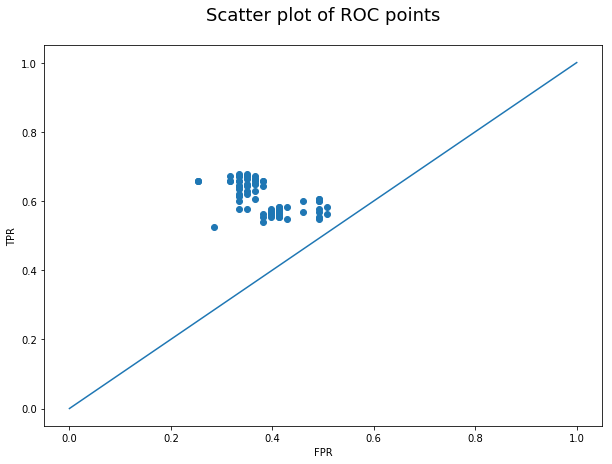

In [2599]:
rocs=plot_rocs(np.linspace(0.01,5,101))
plt.figure(figsize=(10,7))
plt.scatter(rocs[:,0],rocs[:,1])
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Scatter plot of ROC points', y=1.05, fontsize=18)
plt.show()

We can interpret the ROC (Receeriver operating characteristic) curve by saying that:
- All the points seem to be centered, which means that the typer I errors and type II erors are equally distributed
- Ideally we would have more points towards the point (0,1), which is the ROC point of the perfect fit
- Ideally we would also plot the ROC curve by scaning the hyperparameter b, which would give more dispersed results
- The centered cluster of ROC points shows that either the RBF kernel is not the most appropriate kernel for our data, or maybe some computational errors (like the tuning of b) have lead to this good quality model but not perfect.

#### Conclusion of the classification 

We can summarise the 3 methods of binary classification in the table below:

| Regression models | in-sample accuracy | in-sample F1-score | out-of-sample accuracy | out-of-sample F1-score |
| --- | --- | --- | --- | --- | 
| Logistic regression | 73.875 % | 82.742 % | 71.500 % | 80.546 % |
| Random Forest | 82.875 % | 89.118 % | 74.000 % | 83.648 % |
| Linear Hard SVM | 73.500 % | 72.000 % | 82.594 %| 80.952 % |
| RBF Kerneled Hard SVM | 70.375% | 68.500 % | 82.612 % | 81.306 % |


We chose to evaluate their quality with the F1 score because it takes into account how equally distributed are the errors of type I and II. We not only want to know how accurate our model is but also if it is not: towards what type of error will the model mispredict the target value. 

In conclusion, the best model for binary classification is the Random Forest model. To construct the model from scratch is very computationally heavy, but it is the binary classification model returning the best returning out-of-sample F1 score, meaning that it has the least amount of errors, and has equally distributed errors of type I and II. In the case of our data predicting if the credit applications are successful or not, we are probably more interested in the successful applications (True positives) because they will have a bigger impact on the bank if badly predicted. Therefore, even if the Hard SVM give good accuracies as well, using the random forest would be the optimal choice of model. 

### Conclusion

To conclude on the regression and binary classification tasks, it was very interesting to write the code of the different methods from scratch. It was very benefitial to understand not only how the algorithm and methods work in application but also give a better insight of how to improve the data, the model and the results. 

### References

- Methods for Data Science Coding tasks, by Felix Laumann Imperial College London
- Methods for Data Science Lecture notes, by Mauricio, Imperial College London
- Stack exchange post: 'What is the influence of C in SVM with linear kernal' https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel
- Post @54 on Piazza, by Igor Alejandro Siverone, Imperial College London
- Linear regression models: http://people.duke.edu/~rnau/testing.htm#normality